# import library

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

#TL pecific modules
from keras.applications.inception_v3 import InceptionV3

# import data

In [2]:
base_dir = os.path.join("D:\DATASET_JAMBU\Taftyani")
print("Dataset --> ", os.listdir(base_dir))

Dataset -->  ['KELAS A', 'KELAS B', 'KELAS SUPER', 'luarmutu']


In [3]:
images = []
labels = []
IMG_SIZE = 299
KELAS_A = base_dir + '\KELAS A'
KELAS_B = base_dir + '\KELAS B'
KELAS_SUPER = base_dir + '\KELAS SUPER'
LUARMUTU = base_dir + '\luarmutu'

In [4]:
#fungsi untuk menetapkan label tiap data
def assign_label(img, Mutu_jambu):
    return Mutu_jambu

In [5]:
def make_data(Mutu_jambu, DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img, Mutu_jambu)
        path = os.path.join(DIR,img)
#         img = cv2.imread(path,cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        images.append(np.array(img))
        labels.append(str(label))

In [6]:
make_data('kelas_a', KELAS_A)
print(len(images))

make_data('kelas_b', KELAS_B)
print(len(images))

make_data('kelas_super', KELAS_SUPER)
print(len(images))

make_data('luarmutu', LUARMUTU)
print(len(images))

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 291.91it/s]


40


100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 300.68it/s]


80


100%|█████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 302.09it/s]


122


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:02<00:00, 20.91it/s]

166


# Preprocessing data

In [7]:
le = LabelEncoder()
Y = le.fit_transform(labels)
Y = to_categorical(Y,4)
X = np.array(images)
X = X/255

In [8]:
#split data menjadi train test dan validation data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(98, 299, 299, 3)
(18, 299, 299, 3)
(50, 299, 299, 3)


In [9]:
#augmentasi pada data training
datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

In [10]:
#duplikat data sebanyak skenario yang akan dijalankan agar semua data sama
x_train1, x_val1, x_test1, y_train1, y_val1, y_test1 = x_train, x_val, x_test, y_train, y_val, y_test
x_train2, x_val2, x_test2, y_train2, y_val2, y_test2 = x_train, x_val, x_test, y_train, y_val, y_test
x_train3, x_val3, x_test3, y_train3, y_val3, y_test3 = x_train, x_val, x_test, y_train, y_val, y_test
x_train4, x_val4, x_test4, y_train4, y_val4, y_test4 = x_train, x_val, x_test, y_train, y_val, y_test
x_train5, x_val5, x_test5, y_train5, y_val5, y_test5 = x_train, x_val, x_test, y_train, y_val, y_test
x_train6, x_val6, x_test6, y_train6, y_val6, y_test6 = x_train, x_val, x_test, y_train, y_val, y_test
x_train7, x_val7, x_test7, y_train7, y_val7, y_test7 = x_train, x_val, x_test, y_train, y_val, y_test
x_train8, x_val8, x_test8, y_train8, y_val8, y_test8 = x_train, x_val, x_test, y_train, y_val, y_test
x_train9, x_val9, x_test9, y_train9, y_val9, y_test9 = x_train, x_val, x_test, y_train, y_val, y_test
x_train10, x_val10, x_test10, y_train10, y_val10, y_test10 = x_train, x_val, x_test, y_train, y_val, y_test
x_train11, x_val11, x_test11, y_train11, y_val11, y_test11 = x_train, x_val, x_test, y_train, y_val, y_test
x_train12, x_val12, x_test12, y_train12, y_val12, y_test12 = x_train, x_val, x_test, y_train, y_val, y_test
x_train13, x_val13, x_test13, y_train13, y_val13, y_test13 = x_train, x_val, x_test, y_train, y_val, y_test
x_train14, x_val14, x_test14, y_train14, y_val14, y_test14 = x_train, x_val, x_test, y_train, y_val, y_test
x_train15, x_val15, x_test15, y_train15, y_val15, y_test15 = x_train, x_val, x_test, y_train, y_val, y_test
x_train16, x_val16, x_test16, y_train16, y_val16, y_test16 = x_train, x_val, x_test, y_train, y_val, y_test
x_train17, x_val17, x_test17, y_train17, y_val17, y_test17 = x_train, x_val, x_test, y_train, y_val, y_test
x_train18, x_val18, x_test18, y_train18, y_val18, y_test18 = x_train, x_val, x_test, y_train, y_val, y_test


In [11]:
x_train19, x_val19, x_test19, y_train19, y_val19, y_test19 = x_train, x_val, x_test, y_train, y_val, y_test
x_train20, x_val20, x_test20, y_train20, y_val20, y_test20 = x_train, x_val, x_test, y_train, y_val, y_test
x_train21, x_val21, x_test21, y_train21, y_val21, y_test21 = x_train, x_val, x_test, y_train, y_val, y_test

# permodelan

In [12]:
local_weights_file = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
inceptionv3 = InceptionV3(input_shape=(299, 299, 3),
                                    include_top=False,
                                    weights=local_weights_file)
inceptionv3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [13]:
for layer in inceptionv3.layers:
    layer.trainable = False

last_layer = inceptionv3.layers[-1]
last_output = last_layer.output

In [14]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inceptionv3.input, x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [15]:
# duplikat model sesuai skenario yang akan dijalankan
# dalam skenario awal ini dilakukan dengan melakukan tuning epochs dan Learning rate
# skenario untuk melihat pengaruh dropout layer dijlankan dalam skenario selanjutnya

model1=model #epochs 100 Lr 0.001(default)
model2=model #epochs 100 Lr 0.005
model3=model #epochs 100 Lr 0.0001
model4=model #epochs 100 Lr 0.0005
model5=model #epochs 100 Lr 0.00001
model6=model #epochs 100 Lr 0.00005

model7=model #epochs 200 Lr 0.001(default)
model8=model #epochs 200 Lr 0.005
model9=model #epochs 200 Lr 0.0001
model10=model #epochs 200 Lr 0.0005
model11=model #epochs 200 Lr 0.00001
model12=model #epochs 200 Lr 0.00005

# ---------Skenario ke 1 epochs 100 dan learning rate 0.001-0.00005 ----------------

# Model 1

# Training

In [16]:
model1.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history1=model1.fit(datagen.flow(x_train1, y_train1),
            validation_data=(x_val1, y_val1),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 32s 6s/step - loss: 19.2625 - accuracy: 0.3367 - val_loss: 8.7317 - val_accuracy: 0.5556
Epoch 2/100
4/4 [==============================] - 2s 559ms/step - loss: 8.6179 - accuracy: 0.4592 - val_loss: 2.5248 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 2s 349ms/step - loss: 6.1368 - accuracy: 0.5510 - val_loss: 3.9052 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 2s 447ms/step - loss: 7.2935 - accuracy: 0.5714 - val_loss: 3.4768 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 2s 451ms/step - loss: 4.9983 - accuracy: 0.6531 - val_loss: 4.0946 - val_accuracy: 0.6111
Epoch 6/100
4/4 [==============================] - 2s 450ms/step - loss: 1.7851 - accuracy: 0.7959 - val_loss: 3.3147 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 2s 447ms/step - loss: 1.3440 - accuracy: 0.8163 - val_loss: 2.4977 - val_accuracy: 0.7222
Epoch 8/100
4/

Epoch 59/100
4/4 [==============================] - 2s 359ms/step - loss: 1.3612 - accuracy: 0.9082 - val_loss: 1.0565 - val_accuracy: 0.9444
Epoch 60/100
4/4 [==============================] - 2s 352ms/step - loss: 3.1138 - accuracy: 0.8163 - val_loss: 1.0323 - val_accuracy: 0.8889
Epoch 61/100
4/4 [==============================] - 2s 352ms/step - loss: 3.1933 - accuracy: 0.8265 - val_loss: 0.7080 - val_accuracy: 0.9444
Epoch 62/100
4/4 [==============================] - 2s 352ms/step - loss: 3.0262 - accuracy: 0.8367 - val_loss: 2.0542 - val_accuracy: 0.8333
Epoch 63/100
4/4 [==============================] - 2s 462ms/step - loss: 3.0800 - accuracy: 0.8469 - val_loss: 1.3729 - val_accuracy: 0.7778
Epoch 64/100
4/4 [==============================] - 2s 453ms/step - loss: 1.1300 - accuracy: 0.9184 - val_loss: 1.8689 - val_accuracy: 0.9444
Epoch 65/100
4/4 [==============================] - 2s 459ms/step - loss: 2.8260 - accuracy: 0.8571 - val_loss: 2.6348 - val_accuracy: 0.8333
Epoch 

# evaluasi, testing dan visualisasi

In [18]:
history1.history

{'loss': [19.262462615966797,
  8.617852210998535,
  6.136792182922363,
  7.293489456176758,
  4.998302459716797,
  1.7851433753967285,
  1.344010353088379,
  1.8237874507904053,
  2.6201934814453125,
  1.7153698205947876,
  1.497130274772644,
  1.1730936765670776,
  0.9255015850067139,
  1.6999810934066772,
  2.9676408767700195,
  2.953331232070923,
  6.807733535766602,
  5.349078178405762,
  10.861903190612793,
  4.714245319366455,
  5.089344024658203,
  2.348773241043091,
  7.4879374504089355,
  3.930490255355835,
  3.939842700958252,
  3.8864665031433105,
  7.269344806671143,
  2.501992702484131,
  3.8428118228912354,
  2.3341004848480225,
  2.182582378387451,
  5.8463215827941895,
  3.9813449382781982,
  3.556065559387207,
  2.1342122554779053,
  2.1916744709014893,
  4.325065612792969,
  2.9262797832489014,
  2.5698370933532715,
  1.369971752166748,
  1.291115164756775,
  0.7682670950889587,
  2.1168384552001953,
  0.8283703923225403,
  1.6514332294464111,
  2.8413166999816895,
 

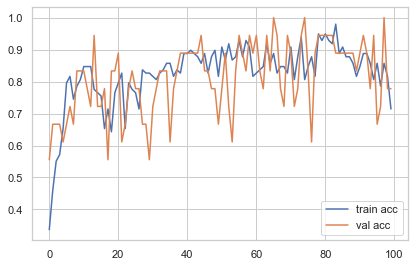

average acc = 0.8252040833234787
average val acc = 0.8122222191095352
max acc = 0.9795918464660645
max val acc = 1.0


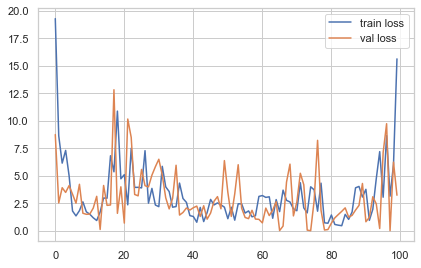

average loss = 3.295047963261604
average val loss = 2.9759327563495024
max loss = 19.262462615966797
max val loss = 12.803566932678223


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta1 = np.mean(history1.history['accuracy'])
print('average acc = {}'.format(ta1))
va1 = np.mean(history1.history['val_accuracy'])
print('average val acc = {}'.format(va1))
ta1a = np.max(history1.history['accuracy'])
print('max acc = {}'.format(ta1a))
va1a = np.max(history1.history['val_accuracy'])
print('max val acc = {}'.format(va1a))

# loss
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl1 = np.mean(history1.history['loss'])
print('average loss = {}'.format(tl1))
vl1 = np.mean(history1.history['val_loss'])
print('average val loss = {}'.format(vl1))
tl1a = np.max(history1.history['loss'])
print('max loss = {}'.format(tl1a))
vl1a = np.max(history1.history['val_loss'])
print('max val loss = {}'.format(vl1a))

In [20]:
score1 = model1.evaluate(x_val1, y_val1,  verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 3.2218501567840576
Test accuracy: 0.7777777910232544


In [21]:
Y_pred1 = model1.predict_generator(x_test1)
y_pred1 = np.argmax(Y_pred1, axis=1)
y_test1 = np.argmax(y_test1, axis=1)
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)

[[ 6  4  1  0]
 [ 1 12  0  0]
 [ 0  2 14  0]
 [ 0  0  0 10]]


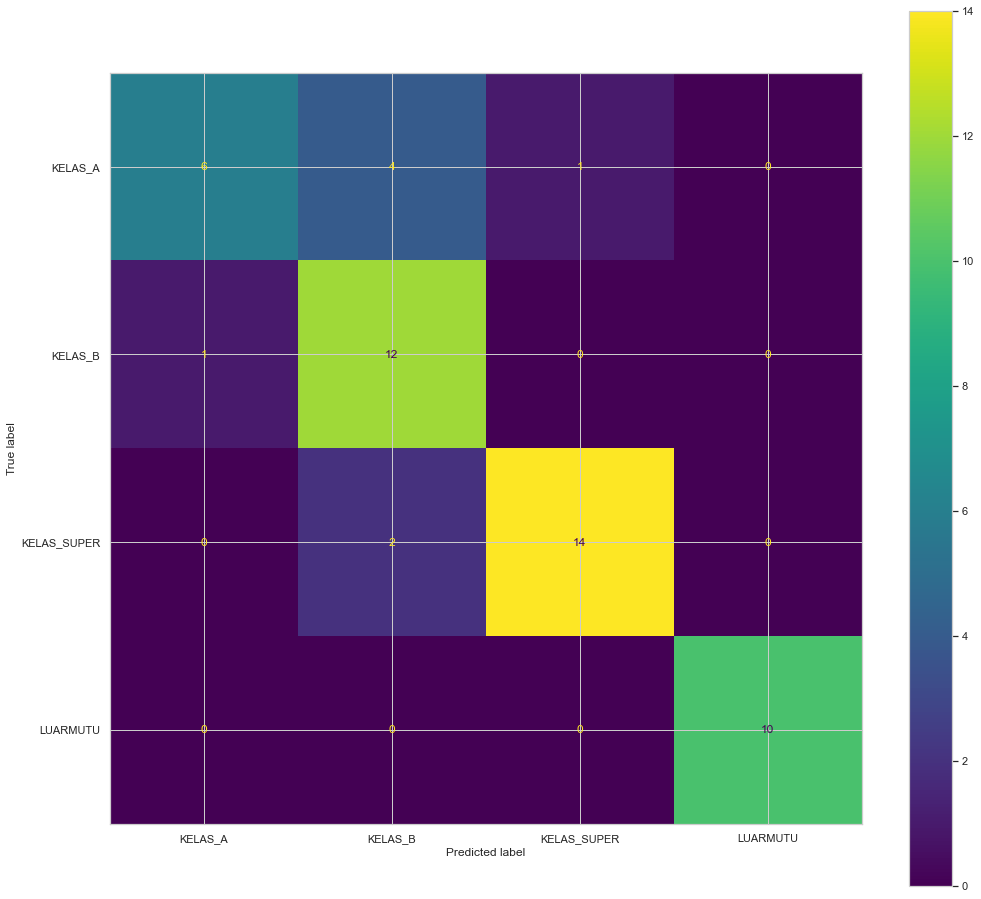

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test1, y_pred1, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.86      0.55      0.67        11
     KELAS_B       0.67      0.92      0.77        13
 KELAS_SUPER       0.93      0.88      0.90        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.84        50
   macro avg       0.86      0.84      0.84        50
weighted avg       0.86      0.84      0.84        50



# --------------------------------------------------------------------------------

# Model 2

# Training

In [16]:
model2.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history2=model2.fit(datagen.flow(x_train2, y_train2),
            validation_data=(x_val2, y_val2),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 27s 4s/step - loss: 70.1221 - accuracy: 0.3163 - val_loss: 55.3812 - val_accuracy: 0.4444
Epoch 2/100
4/4 [==============================] - 2s 568ms/step - loss: 69.0817 - accuracy: 0.4694 - val_loss: 38.5123 - val_accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 2s 596ms/step - loss: 50.3625 - accuracy: 0.5204 - val_loss: 35.3141 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 2s 364ms/step - loss: 28.6321 - accuracy: 0.6633 - val_loss: 25.0108 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 2s 454ms/step - loss: 18.2867 - accuracy: 0.6429 - val_loss: 9.9089 - val_accuracy: 0.7778
Epoch 6/100
4/4 [==============================] - 2s 358ms/step - loss: 18.3428 - accuracy: 0.6735 - val_loss: 2.7594 - val_accuracy: 0.8333
Epoch 7/100
4/4 [==============================] - 2s 346ms/step - loss: 16.7606 - accuracy: 0.7143 - val_loss: 39.4703 - val_accuracy: 0.4444
Epo

# evaluasi, testing dan visualisasi

In [18]:
history2.history

{'loss': [70.1220703125,
  69.08170318603516,
  50.3625373840332,
  28.632143020629883,
  18.28668975830078,
  18.342763900756836,
  16.76064109802246,
  19.506467819213867,
  22.280303955078125,
  15.39172077178955,
  11.191834449768066,
  13.819884300231934,
  25.157926559448242,
  20.647930145263672,
  17.390371322631836,
  22.7442684173584,
  36.12095642089844,
  26.182968139648438,
  22.159976959228516,
  21.186086654663086,
  16.18729591369629,
  18.932518005371094,
  37.368438720703125,
  14.76147174835205,
  10.807927131652832,
  14.128503799438477,
  10.984028816223145,
  14.363835334777832,
  7.614044666290283,
  7.223109245300293,
  9.50633430480957,
  13.531749725341797,
  11.911373138427734,
  13.00955867767334,
  16.345584869384766,
  16.284744262695312,
  23.692302703857422,
  21.0261173248291,
  35.89437484741211,
  17.932249069213867,
  18.43326187133789,
  9.312490463256836,
  9.29600715637207,
  9.107824325561523,
  7.341931343078613,
  8.469245910644531,
  13.399134

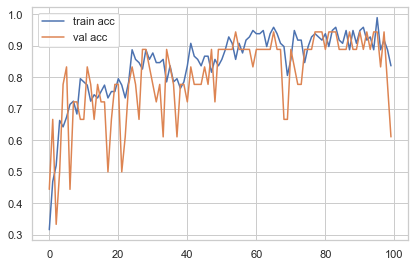

average acc = 0.8445918366312981
average val acc = 0.803333332836628
max acc = 0.9897959232330322
max val acc = 0.9444444179534912


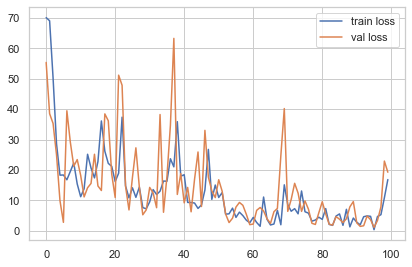

average loss = 12.797526442110538
average val loss = 14.499287343025207
max loss = 70.1220703125
max val loss = 63.29197692871094


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta2 = np.mean(history2.history['accuracy'])
print('average acc = {}'.format(ta2))
va2 = np.mean(history2.history['val_accuracy'])
print('average val acc = {}'.format(va2))
ta2a = np.max(history2.history['accuracy'])
print('max acc = {}'.format(ta2a))
va2a = np.max(history2.history['val_accuracy'])
print('max val acc = {}'.format(va2a))

# loss
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl2 = np.mean(history2.history['loss'])
print('average loss = {}'.format(tl2))
vl2 = np.mean(history2.history['val_loss'])
print('average val loss = {}'.format(vl2))
tl2a = np.max(history2.history['loss'])
print('max loss = {}'.format(tl2a))
vl2a = np.max(history2.history['val_loss'])
print('max val loss = {}'.format(vl2a))


In [20]:
score2 = model2.evaluate(x_val2, y_val2,  verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 19.250394821166992
Test accuracy: 0.6111111044883728


In [21]:
Y_pred2 = model2.predict_generator(x_test2)
y_pred2 = np.argmax(Y_pred2, axis=1)
y_test2 = np.argmax(y_test2, axis=1)
cm2 = confusion_matrix(y_test2, y_pred2)
print(cm2)

[[ 4  7  0  0]
 [ 1 12  0  0]
 [ 1  3 12  0]
 [ 0  0  0 10]]


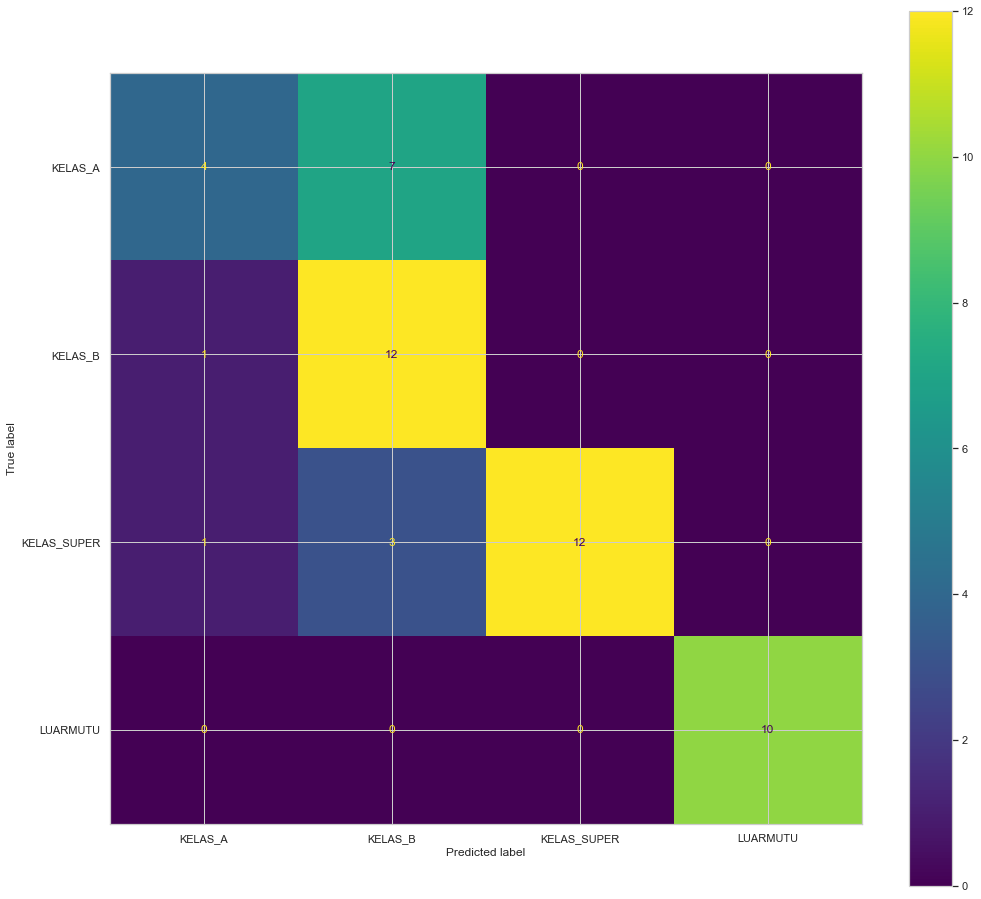

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred2, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.67      0.36      0.47        11
     KELAS_B       0.55      0.92      0.69        13
 KELAS_SUPER       1.00      0.75      0.86        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.76        50
   macro avg       0.80      0.76      0.75        50
weighted avg       0.81      0.76      0.76        50



# ------------------------------------------------------------------------------------------

# Model 3

In [16]:
model3.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history3=model3.fit(datagen.flow(x_train3, y_train3),
            validation_data=(x_val3, y_val3),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 27s 4s/step - loss: 2.1098 - accuracy: 0.3673 - val_loss: 1.3801 - val_accuracy: 0.2222
Epoch 2/100
4/4 [==============================] - 2s 449ms/step - loss: 1.1465 - accuracy: 0.4796 - val_loss: 1.1487 - val_accuracy: 0.5556
Epoch 3/100
4/4 [==============================] - 2s 358ms/step - loss: 0.7425 - accuracy: 0.6939 - val_loss: 0.8907 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 2s 353ms/step - loss: 0.9085 - accuracy: 0.6735 - val_loss: 0.7615 - val_accuracy: 0.6111
Epoch 5/100
4/4 [==============================] - 2s 459ms/step - loss: 0.8542 - accuracy: 0.6837 - val_loss: 1.4203 - val_accuracy: 0.5000
Epoch 6/100
4/4 [==============================] - 2s 360ms/step - loss: 0.6931 - accuracy: 0.7347 - val_loss: 0.7891 - val_accuracy: 0.6111
Epoch 7/100
4/4 [==============================] - 2s 455ms/step - loss: 0.9042 - accuracy: 0.7143 - val_loss: 0.4360 - val_accuracy: 0.7778
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 468ms/step - loss: 0.1483 - accuracy: 0.9286 - val_loss: 0.1973 - val_accuracy: 0.9444
Epoch 60/100
4/4 [==============================] - 2s 457ms/step - loss: 0.1701 - accuracy: 0.9286 - val_loss: 0.4097 - val_accuracy: 0.7778
Epoch 61/100
4/4 [==============================] - 2s 459ms/step - loss: 0.3309 - accuracy: 0.8878 - val_loss: 0.2220 - val_accuracy: 0.9444
Epoch 62/100
4/4 [==============================] - 2s 463ms/step - loss: 0.2621 - accuracy: 0.8673 - val_loss: 0.6853 - val_accuracy: 0.7222
Epoch 63/100
4/4 [==============================] - 2s 469ms/step - loss: 0.2761 - accuracy: 0.8776 - val_loss: 0.3304 - val_accuracy: 0.7778
Epoch 64/100
4/4 [==============================] - 2s 579ms/step - loss: 0.2791 - accuracy: 0.8878 - val_loss: 0.5242 - val_accuracy: 0.7778
Epoch 65/100
4/4 [==============================] - 2s 457ms/step - loss: 0.1521 - accuracy: 0.9592 - val_loss: 0.1799 - val_accuracy: 0.8889
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history3.history

{'loss': [2.1097638607025146,
  1.146517038345337,
  0.7424542903900146,
  0.9085039496421814,
  0.8541955947875977,
  0.6931065320968628,
  0.9042202830314636,
  0.6492679119110107,
  0.7044901847839355,
  0.3996729254722595,
  0.5804653763771057,
  0.29709258675575256,
  0.43581071496009827,
  0.47288015484809875,
  0.4310665428638458,
  0.34222108125686646,
  0.3980990946292877,
  0.4235385060310364,
  0.3922702670097351,
  0.4524487555027008,
  0.5931971669197083,
  0.6089470982551575,
  0.2696966528892517,
  0.3888546824455261,
  0.6228597164154053,
  0.4364413917064667,
  0.8902183175086975,
  0.9444578289985657,
  0.579801082611084,
  0.4721513092517853,
  0.20110194385051727,
  0.4207088053226471,
  0.37796783447265625,
  0.4017896354198456,
  0.3697011470794678,
  0.18387185037136078,
  0.22206123173236847,
  0.23593458533287048,
  0.19757404923439026,
  0.19289709627628326,
  0.16863858699798584,
  0.2342950850725174,
  0.24458444118499756,
  0.25062456727027893,
  0.27046209

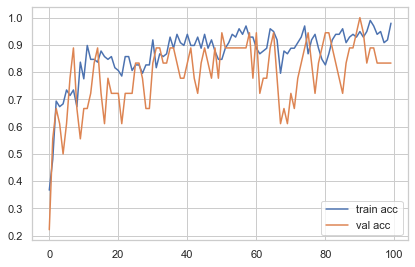

average acc = 0.8696938794851303
average val acc = 0.7944444413483143
max acc = 0.9897959232330322
max val acc = 1.0


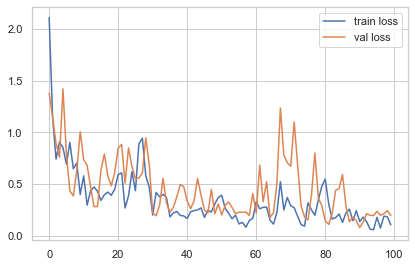

average loss = 0.35421381421387194
average val loss = 0.45885923743247986
max loss = 2.1097638607025146
max val loss = 1.4203295707702637


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta3 = np.mean(history3.history['accuracy'])
print('average acc = {}'.format(ta3))
va3 = np.mean(history3.history['val_accuracy'])
print('average val acc = {}'.format(va3))
ta3a = np.max(history3.history['accuracy'])
print('max acc = {}'.format(ta3a))
va3a = np.max(history3.history['val_accuracy'])
print('max val acc = {}'.format(va3a))


# loss
plt.plot(history3.history['loss'], label='train loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl3 = np.mean(history3.history['loss'])
print('average loss = {}'.format(tl3))
vl3 = np.mean(history3.history['val_loss'])
print('average val loss = {}'.format(vl3))
tl3a = np.max(history3.history['loss'])
print('max loss = {}'.format(tl3a))
vl3a = np.max(history3.history['val_loss'])
print('max val loss = {}'.format(vl3a))

In [20]:
score3 = model3.evaluate(x_val3, y_val3,  verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.19625169038772583
Test accuracy: 0.8333333134651184


In [21]:
Y_pred3 = model3.predict_generator(x_test3)
y_pred3 = np.argmax(Y_pred3, axis=1)
y_test3 = np.argmax(y_test3, axis=1)
cm3 = confusion_matrix(y_test3, y_pred3)
print(cm3)

[[ 9  2  0  0]
 [ 1 12  0  0]
 [ 2  0 14  0]
 [ 0  0  0 10]]


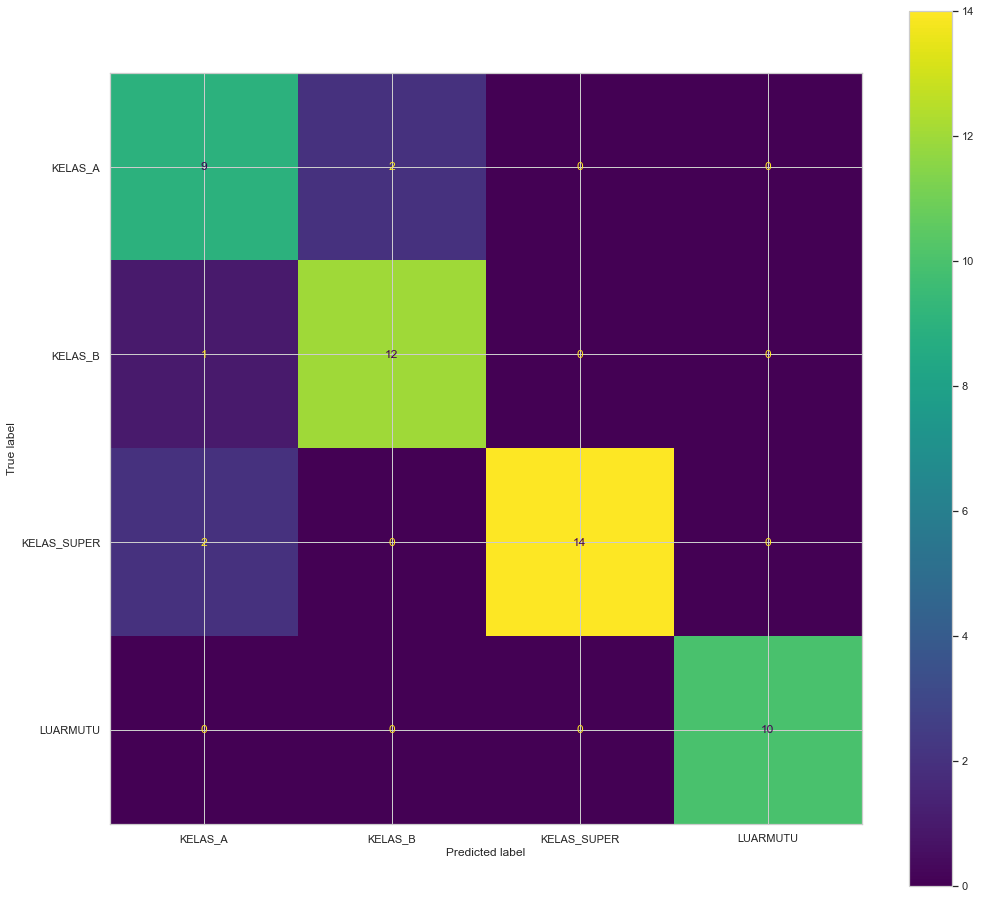

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test3, y_pred3, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test3, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.75      0.82      0.78        11
     KELAS_B       0.86      0.92      0.89        13
 KELAS_SUPER       1.00      0.88      0.93        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



# --------------------------------------------------------------------------

# Model 4

In [16]:
model4.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history4 = model4.fit(datagen.flow(x_train4, y_train4),
            validation_data=(x_val4, y_val4),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 27s 6s/step - loss: 7.6480 - accuracy: 0.2857 - val_loss: 4.4527 - val_accuracy: 0.3889
Epoch 2/100
4/4 [==============================] - 2s 354ms/step - loss: 3.5764 - accuracy: 0.4694 - val_loss: 4.6618 - val_accuracy: 0.5000
Epoch 3/100
4/4 [==============================] - 2s 578ms/step - loss: 2.5651 - accuracy: 0.6122 - val_loss: 1.5611 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 2s 570ms/step - loss: 1.9384 - accuracy: 0.6429 - val_loss: 1.3312 - val_accuracy: 0.6667
Epoch 5/100
4/4 [==============================] - 2s 453ms/step - loss: 2.2480 - accuracy: 0.6327 - val_loss: 3.9213 - val_accuracy: 0.4444
Epoch 6/100
4/4 [==============================] - 2s 464ms/step - loss: 2.1822 - accuracy: 0.6735 - val_loss: 3.1697 - val_accuracy: 0.5000
Epoch 7/100
4/4 [==============================] - 2s 357ms/step - loss: 1.8832 - accuracy: 0.7041 - val_loss: 2.2328 - val_accuracy: 0.7222
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 360ms/step - loss: 1.1734 - accuracy: 0.8673 - val_loss: 0.9633 - val_accuracy: 0.7778
Epoch 60/100
4/4 [==============================] - 2s 458ms/step - loss: 1.3856 - accuracy: 0.8673 - val_loss: 1.1663 - val_accuracy: 0.8333
Epoch 61/100
4/4 [==============================] - 2s 361ms/step - loss: 2.7757 - accuracy: 0.7857 - val_loss: 1.1089 - val_accuracy: 0.8333
Epoch 62/100
4/4 [==============================] - 2s 363ms/step - loss: 1.8615 - accuracy: 0.8163 - val_loss: 2.0584 - val_accuracy: 0.6111
Epoch 63/100
4/4 [==============================] - 2s 460ms/step - loss: 5.3882 - accuracy: 0.7551 - val_loss: 9.2126 - val_accuracy: 0.5000
Epoch 64/100
4/4 [==============================] - 2s 465ms/step - loss: 4.7998 - accuracy: 0.6735 - val_loss: 1.1907 - val_accuracy: 0.8333
Epoch 65/100
4/4 [==============================] - 2s 349ms/step - loss: 0.5181 - accuracy: 0.9388 - val_loss: 0.7632 - val_accuracy: 0.8889
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history4.history

{'loss': [7.6479620933532715,
  3.5764129161834717,
  2.5650789737701416,
  1.9384379386901855,
  2.247966766357422,
  2.1821515560150146,
  1.883197546005249,
  2.0228312015533447,
  1.482193112373352,
  1.8542109727859497,
  0.7857556343078613,
  1.4960308074951172,
  1.498549222946167,
  1.3184030055999756,
  1.2864388227462769,
  1.4646810293197632,
  0.8412548899650574,
  0.6379491686820984,
  0.9809362292289734,
  0.7370802164077759,
  1.0306206941604614,
  0.37613120675086975,
  0.572007954120636,
  0.7766153812408447,
  1.3378373384475708,
  1.8603302240371704,
  0.80068439245224,
  0.7946787476539612,
  2.312095880508423,
  1.7740434408187866,
  2.137564182281494,
  2.2825589179992676,
  3.2383575439453125,
  2.618981122970581,
  1.490584135055542,
  0.7753242254257202,
  1.5605274438858032,
  1.1794525384902954,
  1.0125634670257568,
  0.5832213163375854,
  1.7088476419448853,
  1.1253434419631958,
  1.89470374584198,
  1.7997338771820068,
  2.116422176361084,
  3.58318209648

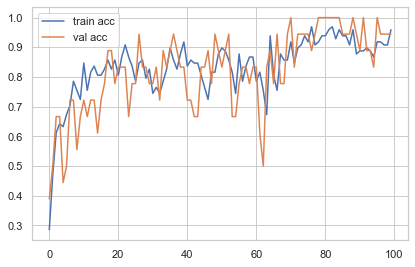

average acc = 0.8350000020861625
average val acc = 0.8227777722477913
max acc = 0.9693877696990967
max val acc = 1.0


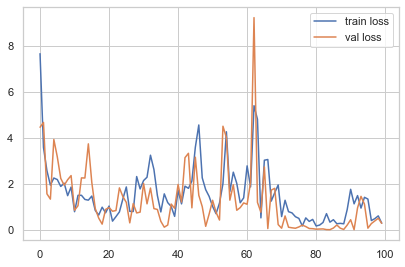

average loss = 1.528971292078495
average val loss = 1.248302236846648
max loss = 7.6479620933532715
max val loss = 9.212574005126953


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history4.history['accuracy'], label='train acc')
plt.plot(history4.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta4 = np.mean(history4.history['accuracy'])
print('average acc = {}'.format(ta4))
va4 = np.mean(history4.history['val_accuracy'])
print('average val acc = {}'.format(va4))
ta4a = np.max(history4.history['accuracy'])
print('max acc = {}'.format(ta4a))
va4a = np.max(history4.history['val_accuracy'])
print('max val acc = {}'.format(va4a))


# loss
plt.plot(history4.history['loss'], label='train loss')
plt.plot(history4.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl4 = np.mean(history4.history['loss'])
print('average loss = {}'.format(tl4))
vl4 = np.mean(history4.history['val_loss'])
print('average val loss = {}'.format(vl4))
tl4a = np.max(history4.history['loss'])
print('max loss = {}'.format(tl4a))
vl4a = np.max(history4.history['val_loss'])
print('max val loss = {}'.format(vl4a))

In [20]:
score4 = model4.evaluate(x_val4, y_val4,  verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.2809189260005951
Test accuracy: 0.9444444179534912


In [21]:
Y_pred4 = model4.predict_generator(x_test4)
y_pred4 = np.argmax(Y_pred4, axis=1)
y_test4 = np.argmax(y_test4, axis=1)
cm4 = confusion_matrix(y_test4, y_pred4)
print(cm4)


[[ 8  0  3  0]
 [ 2 11  0  0]
 [ 0  0 16  0]
 [ 0  0  0 10]]


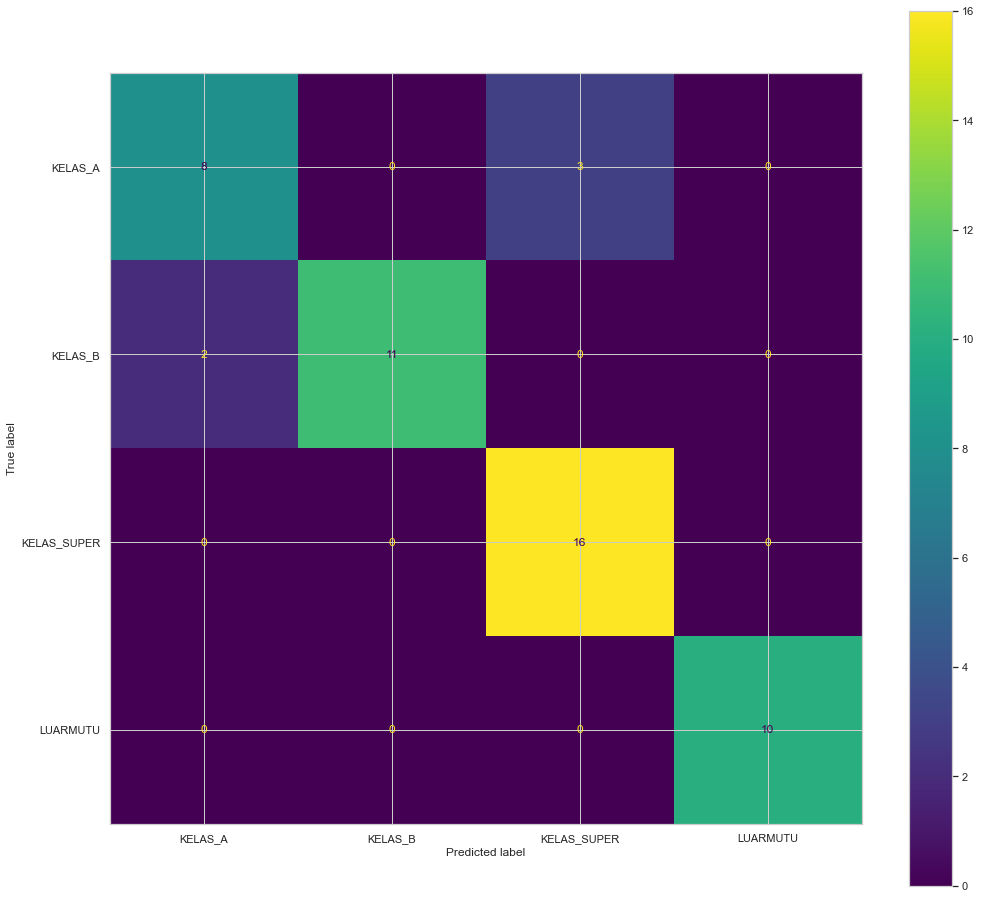

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test4, y_pred4, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test4, y_pred4, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.80      0.73      0.76        11
     KELAS_B       1.00      0.85      0.92        13
 KELAS_SUPER       0.84      1.00      0.91        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.90        50
weighted avg       0.91      0.90      0.90        50



# -------------------------------------------------------------------------------------

# Model 5

In [16]:
model5.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history5 =model5.fit(datagen.flow(x_train5,y_train5),
            validation_data=(x_val5, y_val5),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 27s 4s/step - loss: 1.9152 - accuracy: 0.1327 - val_loss: 1.7571 - val_accuracy: 0.1111
Epoch 2/100
4/4 [==============================] - 2s 570ms/step - loss: 1.6531 - accuracy: 0.2449 - val_loss: 1.6473 - val_accuracy: 0.1111
Epoch 3/100
4/4 [==============================] - 2s 360ms/step - loss: 1.6508 - accuracy: 0.2551 - val_loss: 1.4658 - val_accuracy: 0.2222
Epoch 4/100
4/4 [==============================] - 2s 454ms/step - loss: 1.4377 - accuracy: 0.3469 - val_loss: 1.3130 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 2s 464ms/step - loss: 1.2910 - accuracy: 0.3878 - val_loss: 1.1672 - val_accuracy: 0.6111
Epoch 6/100
4/4 [==============================] - 2s 471ms/step - loss: 1.2538 - accuracy: 0.4388 - val_loss: 1.0699 - val_accuracy: 0.6667
Epoch 7/100
4/4 [==============================] - 2s 357ms/step - loss: 1.1475 - accuracy: 0.5102 - val_loss: 0.9882 - val_accuracy: 0.6667
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 586ms/step - loss: 0.4079 - accuracy: 0.8367 - val_loss: 0.5776 - val_accuracy: 0.7778
Epoch 60/100
4/4 [==============================] - 2s 457ms/step - loss: 0.3899 - accuracy: 0.8367 - val_loss: 0.5933 - val_accuracy: 0.6667
Epoch 61/100
4/4 [==============================] - 2s 360ms/step - loss: 0.4789 - accuracy: 0.8265 - val_loss: 0.5780 - val_accuracy: 0.7778
Epoch 62/100
4/4 [==============================] - 2s 578ms/step - loss: 0.3831 - accuracy: 0.8571 - val_loss: 0.4792 - val_accuracy: 0.7778
Epoch 63/100
4/4 [==============================] - 2s 356ms/step - loss: 0.3856 - accuracy: 0.8367 - val_loss: 0.4394 - val_accuracy: 0.7778
Epoch 64/100
4/4 [==============================] - 2s 580ms/step - loss: 0.4084 - accuracy: 0.8980 - val_loss: 0.4184 - val_accuracy: 0.7778
Epoch 65/100
4/4 [==============================] - 2s 578ms/step - loss: 0.3924 - accuracy: 0.8469 - val_loss: 0.4158 - val_accuracy: 0.7778
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history5.history

{'loss': [1.9152430295944214,
  1.6531291007995605,
  1.6508386135101318,
  1.4377273321151733,
  1.2909737825393677,
  1.253835678100586,
  1.1475136280059814,
  1.1140308380126953,
  1.0643852949142456,
  1.024462342262268,
  0.9543184638023376,
  0.900538980960846,
  0.9182876348495483,
  0.7602807879447937,
  0.7980921268463135,
  0.7692752480506897,
  0.7562375068664551,
  0.7622157335281372,
  0.7036880254745483,
  0.7258671522140503,
  0.7171053290367126,
  0.6095770001411438,
  0.7349673509597778,
  0.6015501618385315,
  0.6270917654037476,
  0.5960996747016907,
  0.6455653309822083,
  0.5625790953636169,
  0.551490306854248,
  0.5951240062713623,
  0.5843659043312073,
  0.5672165155410767,
  0.5209119915962219,
  0.6213663220405579,
  0.5079525113105774,
  0.4810965061187744,
  0.5222317576408386,
  0.4585268795490265,
  0.5319916009902954,
  0.5532479286193848,
  0.5055310726165771,
  0.4767095744609833,
  0.4970288574695587,
  0.5075922608375549,
  0.4856085181236267,
  0.40

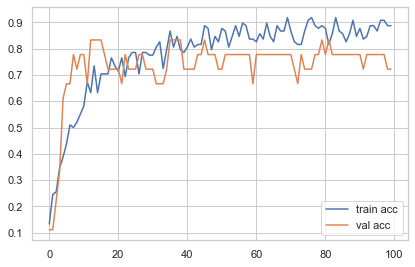

average acc = 0.7798979601264
average val acc = 0.7350000029802323
max acc = 0.918367326259613
max val acc = 0.8333333134651184


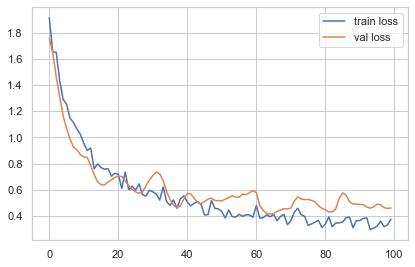

average loss = 0.5666800552606582
average val loss = 0.6156615102291108
max loss = 1.9152430295944214
max val loss = 1.7570524215698242


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history5.history['accuracy'], label='train acc')
plt.plot(history5.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta5 = np.mean(history5.history['accuracy'])
print('average acc = {}'.format(ta5))
va5 = np.mean(history5.history['val_accuracy'])
print('average val acc = {}'.format(va5))
ta5a = np.max(history5.history['accuracy'])
print('max acc = {}'.format(ta5a))
va5a = np.max(history5.history['val_accuracy'])
print('max val acc = {}'.format(va5a))


# loss
plt.plot(history5.history['loss'], label='train loss')
plt.plot(history5.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl5 = np.mean(history5.history['loss'])
print('average loss = {}'.format(tl5))
vl5 = np.mean(history5.history['val_loss'])
print('average val loss = {}'.format(vl5))
tl5a = np.max(history5.history['loss'])
print('max loss = {}'.format(tl5a))
vl5a = np.max(history5.history['val_loss'])
print('max val loss = {}'.format(vl5a))

In [20]:
score5 = model5.evaluate(x_val5, y_val5,  verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

Test loss: 0.4602977931499481
Test accuracy: 0.7222222089767456


In [21]:
Y_pred5 = model5.predict_generator(x_test5)
y_pred5 = np.argmax(Y_pred5, axis=1)
y_test5 = np.argmax(y_test5, axis=1)
cm5 = confusion_matrix(y_test5, y_pred5)
print(cm5)

[[ 9  1  1  0]
 [ 2 11  0  0]
 [ 4  0 12  0]
 [ 0  0  0 10]]


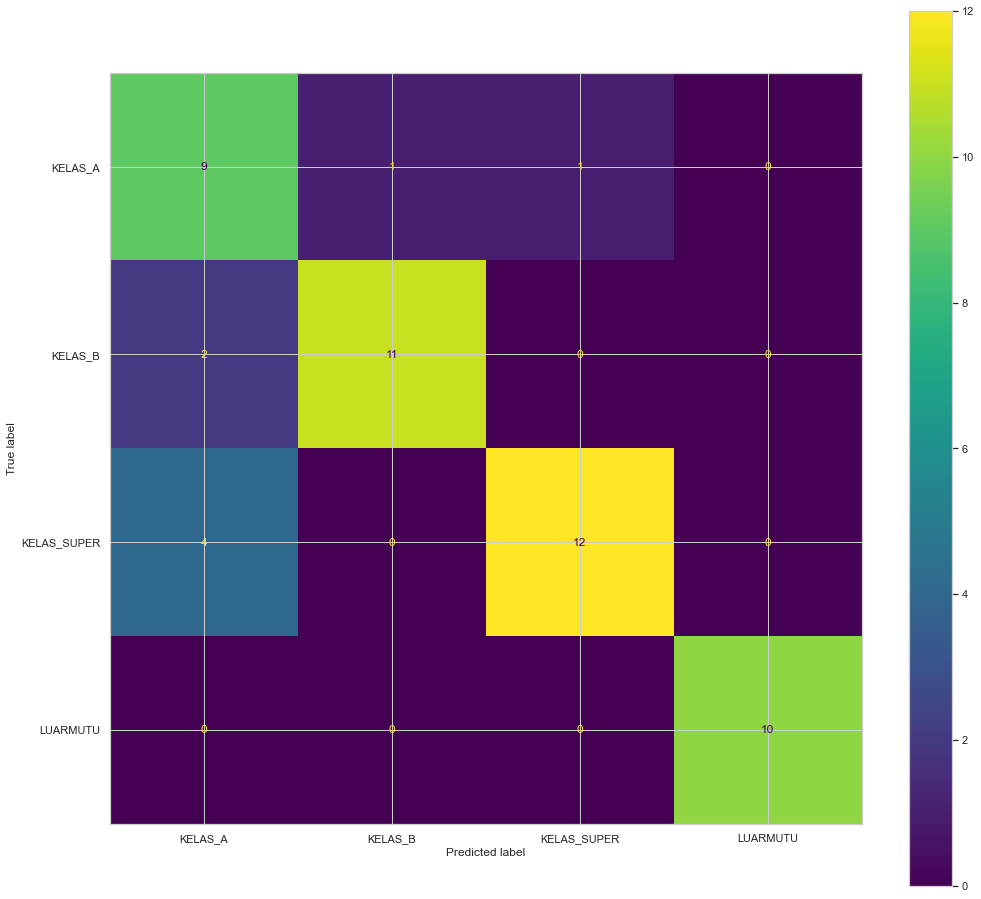

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test5, y_pred5, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test5, y_pred5, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.60      0.82      0.69        11
     KELAS_B       0.92      0.85      0.88        13
 KELAS_SUPER       0.92      0.75      0.83        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.84        50
   macro avg       0.86      0.85      0.85        50
weighted avg       0.87      0.84      0.85        50



# ------------------------------------------------------------------------

# Model 6

In [16]:
model6.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history6 =model6.fit(datagen.flow(x_train6,y_train6),
            validation_data=(x_val6, y_val6),
            epochs=100)

Epoch 1/100
4/4 [==============================] - 27s 6s/step - loss: 2.0683 - accuracy: 0.2245 - val_loss: 0.9799 - val_accuracy: 0.5556
Epoch 2/100
4/4 [==============================] - 2s 355ms/step - loss: 1.6381 - accuracy: 0.4388 - val_loss: 0.7745 - val_accuracy: 0.7222
Epoch 3/100
4/4 [==============================] - 2s 359ms/step - loss: 1.0431 - accuracy: 0.5714 - val_loss: 0.8250 - val_accuracy: 0.6667
Epoch 4/100
4/4 [==============================] - 2s 454ms/step - loss: 0.8741 - accuracy: 0.5612 - val_loss: 0.8427 - val_accuracy: 0.6111
Epoch 5/100
4/4 [==============================] - 2s 453ms/step - loss: 0.8164 - accuracy: 0.6224 - val_loss: 0.6087 - val_accuracy: 0.7222
Epoch 6/100
4/4 [==============================] - 2s 460ms/step - loss: 0.6656 - accuracy: 0.7143 - val_loss: 0.5091 - val_accuracy: 0.7778
Epoch 7/100
4/4 [==============================] - 2s 454ms/step - loss: 0.7521 - accuracy: 0.7347 - val_loss: 0.4455 - val_accuracy: 0.8889
Epoch 8/100
4/4

Epoch 59/100
4/4 [==============================] - 2s 589ms/step - loss: 0.2074 - accuracy: 0.8980 - val_loss: 0.5209 - val_accuracy: 0.7778
Epoch 60/100
4/4 [==============================] - 2s 444ms/step - loss: 0.2430 - accuracy: 0.8980 - val_loss: 0.5475 - val_accuracy: 0.7778
Epoch 61/100
4/4 [==============================] - 2s 358ms/step - loss: 0.2556 - accuracy: 0.9082 - val_loss: 0.5074 - val_accuracy: 0.7778
Epoch 62/100
4/4 [==============================] - 2s 365ms/step - loss: 0.2758 - accuracy: 0.8980 - val_loss: 0.3957 - val_accuracy: 0.8889
Epoch 63/100
4/4 [==============================] - 2s 350ms/step - loss: 0.1963 - accuracy: 0.9286 - val_loss: 0.3012 - val_accuracy: 0.8889
Epoch 64/100
4/4 [==============================] - 2s 359ms/step - loss: 0.2297 - accuracy: 0.8878 - val_loss: 0.2700 - val_accuracy: 0.8889
Epoch 65/100
4/4 [==============================] - 2s 567ms/step - loss: 0.1969 - accuracy: 0.9286 - val_loss: 0.3916 - val_accuracy: 0.8333
Epoch 

# evaluasi testing dan visualisasi

In [18]:
history6.history

{'loss': [2.0682895183563232,
  1.6381021738052368,
  1.0431445837020874,
  0.8740609884262085,
  0.8163740038871765,
  0.6655675768852234,
  0.7521153688430786,
  0.5536030530929565,
  0.5508996844291687,
  0.5943107008934021,
  0.5806785225868225,
  0.6169754862785339,
  0.5019719004631042,
  0.47172975540161133,
  0.48243170976638794,
  0.4436132609844208,
  0.3984889090061188,
  0.3976880609989166,
  0.3465205132961273,
  0.36725911498069763,
  0.30713629722595215,
  0.3471148610115051,
  0.42512941360473633,
  0.3290059566497803,
  0.37587955594062805,
  0.26667770743370056,
  0.416695237159729,
  0.3412037789821625,
  0.40948182344436646,
  0.40189337730407715,
  0.34522414207458496,
  0.29166874289512634,
  0.3051304817199707,
  0.3652423024177551,
  0.4580552279949188,
  0.4091114103794098,
  0.3469068706035614,
  0.24246427416801453,
  0.22860421240329742,
  0.2904339134693146,
  0.3643891215324402,
  0.30051904916763306,
  0.20282979309558868,
  0.31325197219848633,
  0.19759

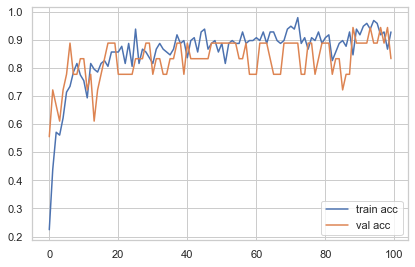

average acc = 0.8576530613005161
average val acc = 0.83
max acc = 0.9795918464660645
max val acc = 0.9444444179534912


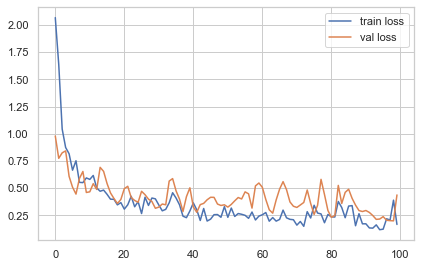

average loss = 0.3539176975935698
average val loss = 0.4198308600485325
max loss = 2.0682895183563232
max val loss = 0.979893684387207


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history6.history['accuracy'], label='train acc')
plt.plot(history6.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta6 = np.mean(history6.history['accuracy'])
print('average acc = {}'.format(ta6))
va6 = np.mean(history6.history['val_accuracy'])
print('average val acc = {}'.format(va6))
ta6a = np.max(history6.history['accuracy'])
print('max acc = {}'.format(ta6a))
va6a = np.max(history6.history['val_accuracy'])
print('max val acc = {}'.format(va6a))


# loss
plt.plot(history6.history['loss'], label='train loss')
plt.plot(history6.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl6 = np.mean(history6.history['loss'])
print('average loss = {}'.format(tl6))
vl6 = np.mean(history6.history['val_loss'])
print('average val loss = {}'.format(vl6))
tl6a = np.max(history6.history['loss'])
print('max loss = {}'.format(tl6a))
vl6a = np.max(history6.history['val_loss'])
print('max val loss = {}'.format(vl6a))

In [20]:
score6 = model6.evaluate(x_val6, y_val6,  verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

Test loss: 0.43777620792388916
Test accuracy: 0.8333333134651184


In [21]:
Y_pred6 = model6.predict_generator(x_test6)
y_pred6 = np.argmax(Y_pred6, axis=1)
y_test6 = np.argmax(y_test6, axis=1)
cm6 = confusion_matrix(y_test6, y_pred6)
print(cm6)

[[11  0  0  0]
 [ 4  9  0  0]
 [ 6  0 10  0]
 [ 0  0  0 10]]


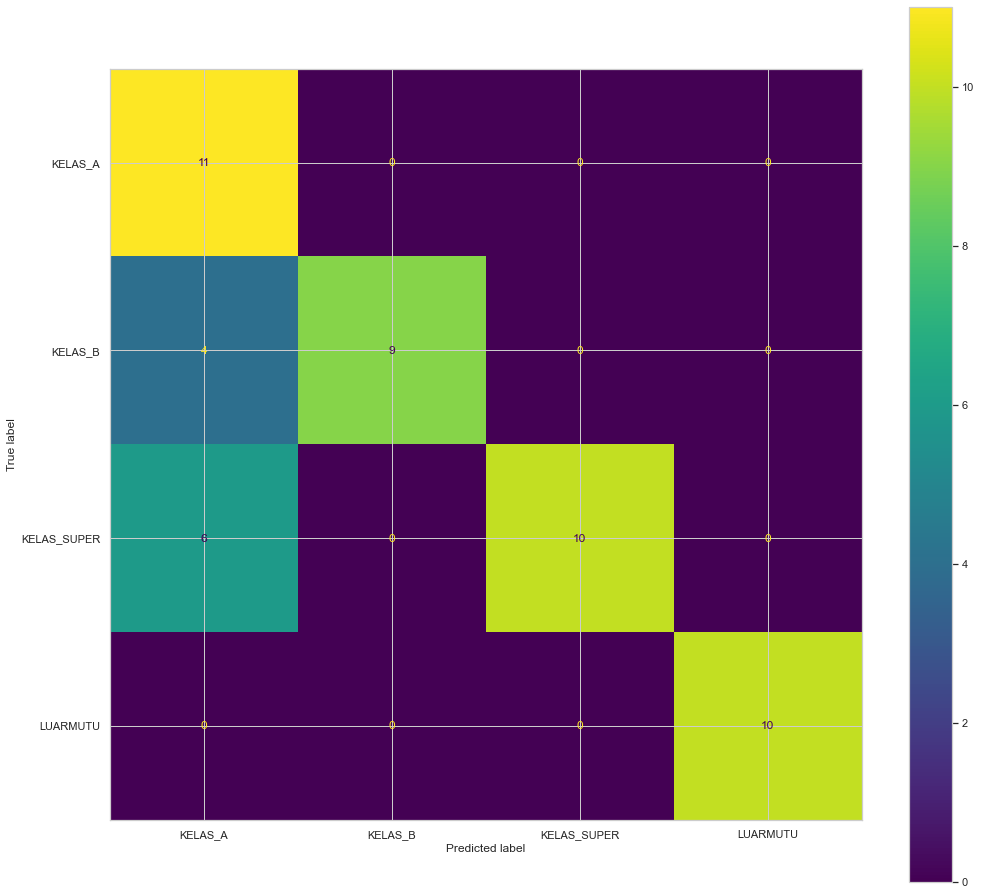

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test6, y_pred6, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test6, y_pred6, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.52      1.00      0.69        11
     KELAS_B       1.00      0.69      0.82        13
 KELAS_SUPER       1.00      0.62      0.77        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.80        50
   macro avg       0.88      0.83      0.82        50
weighted avg       0.90      0.80      0.81        50



# ---------------------------------------------------------------------------------------------------------------

# ---------- Skenario ke 1 epochs 200 dan learning rate 0.001-0.00005 -----------

# Model 7

# Training

In [16]:
model7.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history7 = model7.fit(datagen.flow(x_train7, y_train7),
            validation_data=(x_val7, y_val7),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 23.8099 - accuracy: 0.2245 - val_loss: 36.2221 - val_accuracy: 0.1667
Epoch 2/200
4/4 [==============================] - 2s 452ms/step - loss: 21.9026 - accuracy: 0.2755 - val_loss: 19.9229 - val_accuracy: 0.3889
Epoch 3/200
4/4 [==============================] - 2s 461ms/step - loss: 17.2852 - accuracy: 0.4388 - val_loss: 13.2097 - val_accuracy: 0.5556
Epoch 4/200
4/4 [==============================] - 2s 482ms/step - loss: 10.7317 - accuracy: 0.5000 - val_loss: 5.6457 - val_accuracy: 0.6111
Epoch 5/200
4/4 [==============================] - 2s 374ms/step - loss: 4.3304 - accuracy: 0.7041 - val_loss: 7.7131 - val_accuracy: 0.5556
Epoch 6/200
4/4 [==============================] - 2s 596ms/step - loss: 3.8575 - accuracy: 0.6633 - val_loss: 16.0532 - val_accuracy: 0.4444
Epoch 7/200
4/4 [==============================] - 2s 467ms/step - loss: 5.9547 - accuracy: 0.6735 - val_loss: 3.5084 - val_accuracy: 0.5556
Epoch 8

Epoch 59/200
4/4 [==============================] - 2s 465ms/step - loss: 0.8451 - accuracy: 0.9082 - val_loss: 5.1458e-05 - val_accuracy: 1.0000
Epoch 60/200
4/4 [==============================] - 2s 464ms/step - loss: 0.7178 - accuracy: 0.9286 - val_loss: 0.0119 - val_accuracy: 1.0000
Epoch 61/200
4/4 [==============================] - 2s 584ms/step - loss: 0.4587 - accuracy: 0.9490 - val_loss: 0.3121 - val_accuracy: 0.8333
Epoch 62/200
4/4 [==============================] - 2s 469ms/step - loss: 0.4390 - accuracy: 0.9388 - val_loss: 0.2290 - val_accuracy: 0.8889
Epoch 63/200
4/4 [==============================] - 2s 461ms/step - loss: 0.8535 - accuracy: 0.9490 - val_loss: 0.3522 - val_accuracy: 0.8333
Epoch 64/200
4/4 [==============================] - 2s 364ms/step - loss: 0.5195 - accuracy: 0.9286 - val_loss: 1.8750 - val_accuracy: 0.8333
Epoch 65/200
4/4 [==============================] - 2s 355ms/step - loss: 0.4909 - accuracy: 0.9286 - val_loss: 1.6770 - val_accuracy: 0.8333
Ep

4/4 [==============================] - 2s 472ms/step - loss: 6.4345 - accuracy: 0.7959 - val_loss: 21.1697 - val_accuracy: 0.5000
Epoch 174/200
4/4 [==============================] - 2s 473ms/step - loss: 7.4529 - accuracy: 0.7245 - val_loss: 10.2197 - val_accuracy: 0.5556
Epoch 175/200
4/4 [==============================] - 2s 361ms/step - loss: 2.0123 - accuracy: 0.9082 - val_loss: 4.4982 - val_accuracy: 0.7778
Epoch 176/200
4/4 [==============================] - 2s 466ms/step - loss: 4.3838 - accuracy: 0.8163 - val_loss: 6.8260 - val_accuracy: 0.7778
Epoch 177/200
4/4 [==============================] - 2s 591ms/step - loss: 2.7995 - accuracy: 0.8571 - val_loss: 2.3891 - val_accuracy: 0.8333
Epoch 178/200
4/4 [==============================] - 2s 466ms/step - loss: 0.6349 - accuracy: 0.9286 - val_loss: 2.5737 - val_accuracy: 0.8333
Epoch 179/200
4/4 [==============================] - 2s 366ms/step - loss: 1.3016 - accuracy: 0.9184 - val_loss: 4.2682 - val_accuracy: 0.8333
Epoch 180/2

# evaluasi, testing dan visualisasi

In [18]:
history7.history

{'loss': [23.809938430786133,
  21.90255355834961,
  17.285181045532227,
  10.731742858886719,
  4.330394268035889,
  3.8574795722961426,
  5.9546990394592285,
  2.882751703262329,
  2.5733025074005127,
  10.173397064208984,
  6.553574085235596,
  7.607710838317871,
  9.967387199401855,
  3.9663689136505127,
  2.3302857875823975,
  2.884183406829834,
  3.4086923599243164,
  1.984107494354248,
  2.5478315353393555,
  2.281907320022583,
  4.045762538909912,
  2.1953322887420654,
  2.2454445362091064,
  1.5939040184020996,
  0.9392913579940796,
  1.9753953218460083,
  2.1012043952941895,
  2.162579298019409,
  4.757659435272217,
  3.819910764694214,
  2.3117666244506836,
  2.813398599624634,
  3.4884369373321533,
  1.3518463373184204,
  1.6607110500335693,
  2.874358892440796,
  4.167353630065918,
  3.5275068283081055,
  1.8988569974899292,
  0.9029449820518494,
  2.9007930755615234,
  2.780381202697754,
  1.4263273477554321,
  2.246776580810547,
  0.4400249123573303,
  2.7454538345336914

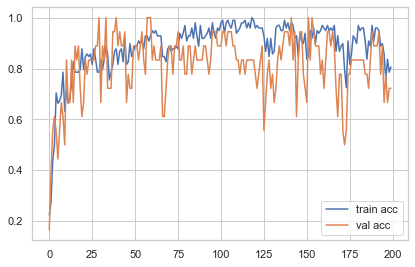

average acc = 0.8846938810497522
average val acc = 0.8147222173959017
max acc = 1.0
max val acc = 1.0


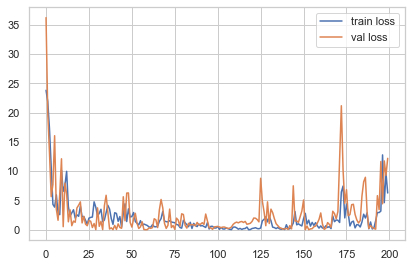

average loss = 2.026323178098537
average val loss = 2.6684851877919753
max loss = 23.809938430786133
max val loss = 36.2220573425293


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history7.history['accuracy'], label='train acc')
plt.plot(history7.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta7 = np.mean(history7.history['accuracy'])
print('average acc = {}'.format(ta7))
va7 = np.mean(history7.history['val_accuracy'])
print('average val acc = {}'.format(va7))
ta7a = np.max(history7.history['accuracy'])
print('max acc = {}'.format(ta7a))
va7a = np.max(history7.history['val_accuracy'])
print('max val acc = {}'.format(va7a))


# loss
plt.plot(history7.history['loss'], label='train loss')
plt.plot(history7.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl7 = np.mean(history7.history['loss'])
print('average loss = {}'.format(tl7))
vl7 = np.mean(history7.history['val_loss'])
print('average val loss = {}'.format(vl7))
tl7a = np.max(history7.history['loss'])
print('max loss = {}'.format(tl7a))
vl7a = np.max(history7.history['val_loss'])
print('max val loss = {}'.format(vl7a))

In [20]:
score7 = model7.evaluate(x_val7, y_val7,  verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

Test loss: 12.190760612487793
Test accuracy: 0.7222222089767456


In [21]:
Y_pred7 = model7.predict_generator(x_test7)
y_pred7 = np.argmax(Y_pred7, axis=1)
y_test7 = np.argmax(y_test7, axis=1)
cm7 = confusion_matrix(y_test7, y_pred7)
print(cm7)

[[ 3  0  8  0]
 [ 0  6  5  2]
 [ 0  0 16  0]
 [ 0  0  0 10]]


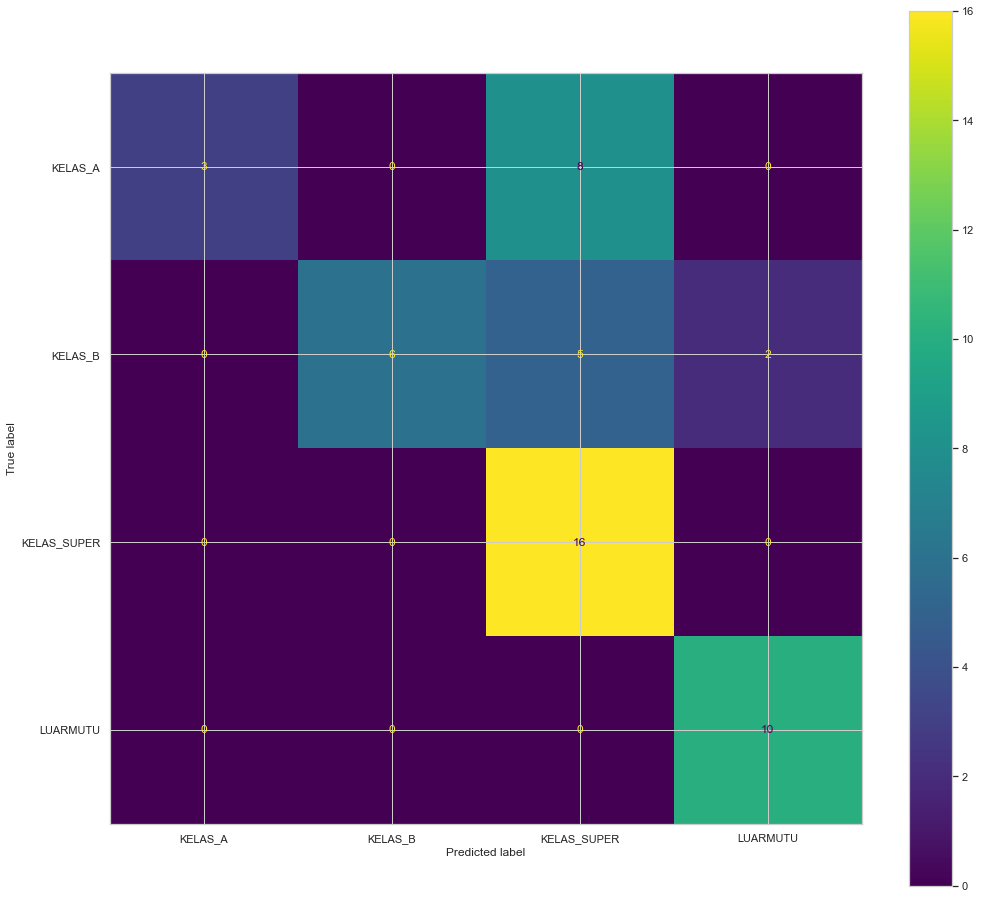

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test7, y_pred7, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test7, y_pred7, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       1.00      0.27      0.43        11
     KELAS_B       1.00      0.46      0.63        13
 KELAS_SUPER       0.55      1.00      0.71        16
    LUARMUTU       0.83      1.00      0.91        10

    accuracy                           0.70        50
   macro avg       0.85      0.68      0.67        50
weighted avg       0.82      0.70      0.67        50



# -----------------------------------------

# Model 8

# Training

In [16]:
model8.compile(optimizer=Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history8 =model8.fit(datagen.flow(x_train8, y_train8),
            validation_data=(x_val8, y_val8),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 67.2782 - accuracy: 0.3163 - val_loss: 33.3840 - val_accuracy: 0.3889
Epoch 2/200
4/4 [==============================] - 2s 453ms/step - loss: 38.2557 - accuracy: 0.3673 - val_loss: 36.3251 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 2s 577ms/step - loss: 21.7197 - accuracy: 0.6122 - val_loss: 19.5064 - val_accuracy: 0.6111
Epoch 4/200
4/4 [==============================] - 2s 449ms/step - loss: 13.4021 - accuracy: 0.6939 - val_loss: 7.6292 - val_accuracy: 0.7778
Epoch 5/200
4/4 [==============================] - 2s 361ms/step - loss: 19.5832 - accuracy: 0.6633 - val_loss: 23.6041 - val_accuracy: 0.5556
Epoch 6/200
4/4 [==============================] - 2s 467ms/step - loss: 13.1269 - accuracy: 0.7755 - val_loss: 9.4004 - val_accuracy: 0.7778
Epoch 7/200
4/4 [==============================] - 2s 457ms/step - loss: 15.4457 - accuracy: 0.7959 - val_loss: 44.7367 - val_accuracy: 0.5556
Epo

4/4 [==============================] - 2s 473ms/step - loss: 22.2674 - accuracy: 0.8163 - val_loss: 32.4943 - val_accuracy: 0.7778
Epoch 116/200
4/4 [==============================] - 2s 466ms/step - loss: 7.7044 - accuracy: 0.8980 - val_loss: 20.0797 - val_accuracy: 0.7778
Epoch 117/200
4/4 [==============================] - 2s 371ms/step - loss: 4.8693 - accuracy: 0.9082 - val_loss: 14.8277 - val_accuracy: 0.8333
Epoch 118/200
4/4 [==============================] - 2s 475ms/step - loss: 5.1474 - accuracy: 0.9388 - val_loss: 11.9228 - val_accuracy: 0.8889
Epoch 119/200
4/4 [==============================] - 2s 369ms/step - loss: 3.0947 - accuracy: 0.9388 - val_loss: 17.7449 - val_accuracy: 0.8333
Epoch 120/200
4/4 [==============================] - 2s 370ms/step - loss: 3.2013 - accuracy: 0.9286 - val_loss: 16.1389 - val_accuracy: 0.8333
Epoch 121/200
4/4 [==============================] - 2s 592ms/step - loss: 4.1361 - accuracy: 0.9184 - val_loss: 15.1117 - val_accuracy: 0.8333
Epoch

Epoch 172/200
4/4 [==============================] - 2s 589ms/step - loss: 3.9005 - accuracy: 0.9286 - val_loss: 0.3269 - val_accuracy: 0.9444
Epoch 173/200
4/4 [==============================] - 2s 470ms/step - loss: 1.9880 - accuracy: 0.9694 - val_loss: 1.8565 - val_accuracy: 0.9444
Epoch 174/200
4/4 [==============================] - 2s 468ms/step - loss: 1.3274 - accuracy: 0.9490 - val_loss: 2.3808 - val_accuracy: 0.9444
Epoch 175/200
4/4 [==============================] - 2s 475ms/step - loss: 1.9169 - accuracy: 0.9796 - val_loss: 2.1235 - val_accuracy: 0.9444
Epoch 176/200
4/4 [==============================] - 2s 469ms/step - loss: 7.7946 - accuracy: 0.8878 - val_loss: 22.9536 - val_accuracy: 0.7222
Epoch 177/200
4/4 [==============================] - 2s 588ms/step - loss: 19.6715 - accuracy: 0.8469 - val_loss: 27.2370 - val_accuracy: 0.6111
Epoch 178/200
4/4 [==============================] - 2s 589ms/step - loss: 28.5433 - accuracy: 0.8571 - val_loss: 1.5919 - val_accuracy: 0.

# evaluasi, testing dan visualisasi

In [18]:
history8.history

{'loss': [67.27824401855469,
  38.25568389892578,
  21.719707489013672,
  13.402132987976074,
  19.58315658569336,
  13.126916885375977,
  15.445686340332031,
  22.830490112304688,
  15.394135475158691,
  23.360212326049805,
  18.837207794189453,
  15.597070693969727,
  21.036205291748047,
  10.666621208190918,
  17.828876495361328,
  23.240997314453125,
  18.476360321044922,
  22.59883689880371,
  12.014618873596191,
  10.292540550231934,
  9.204951286315918,
  6.808490753173828,
  20.10806655883789,
  14.613884925842285,
  15.731895446777344,
  17.566207885742188,
  6.752284526824951,
  6.483798980712891,
  4.110819339752197,
  20.678897857666016,
  32.83278274536133,
  20.26984214782715,
  13.721500396728516,
  13.00657844543457,
  11.277488708496094,
  16.008962631225586,
  7.37404203414917,
  11.389676094055176,
  17.01899528503418,
  14.170653343200684,
  32.65420150756836,
  26.450519561767578,
  11.660881042480469,
  12.2816743850708,
  2.480414628982544,
  8.911115646362305,
 

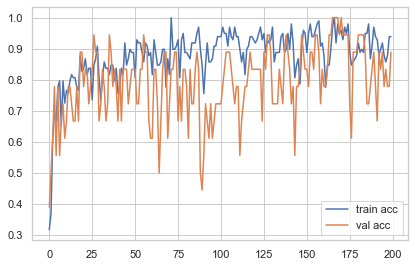

average acc = 0.8777040828764439
average val acc = 0.7911111073195934
max acc = 1.0
max val acc = 1.0


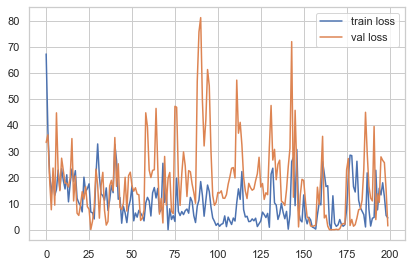

average loss = 10.668060404274486
average val loss = 18.560690938898414
max loss = 67.27824401855469
max val loss = 81.19186401367188


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history8.history['accuracy'], label='train acc')
plt.plot(history8.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta8 = np.mean(history8.history['accuracy'])
print('average acc = {}'.format(ta8))
va8 = np.mean(history8.history['val_accuracy'])
print('average val acc = {}'.format(va8))
ta8a = np.max(history8.history['accuracy'])
print('max acc = {}'.format(ta8a))
va8a = np.max(history8.history['val_accuracy'])
print('max val acc = {}'.format(va8a))

# loss
plt.plot(history8.history['loss'], label='train loss')
plt.plot(history8.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl8 = np.mean(history8.history['loss'])
print('average loss = {}'.format(tl8))
vl8 = np.mean(history8.history['val_loss'])
print('average val loss = {}'.format(vl8))
tl8a = np.max(history8.history['loss'])
print('max loss = {}'.format(tl8a))
vl8a = np.max(history8.history['val_loss'])
print('max val loss = {}'.format(vl8a))

In [20]:
score8 = model8.evaluate(x_val8, y_val8,  verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

Test loss: 1.4404104948043823
Test accuracy: 0.8888888955116272


In [21]:
Y_pred8 = model8.predict_generator(x_test8)
y_pred8 = np.argmax(Y_pred8, axis=1)
y_test8 = np.argmax(y_test8, axis=1)
cm8 = confusion_matrix(y_test8, y_pred8)
print(cm8)

[[ 8  2  1  0]
 [ 1 12  0  0]
 [ 6  0 10  0]
 [ 0  0  0 10]]


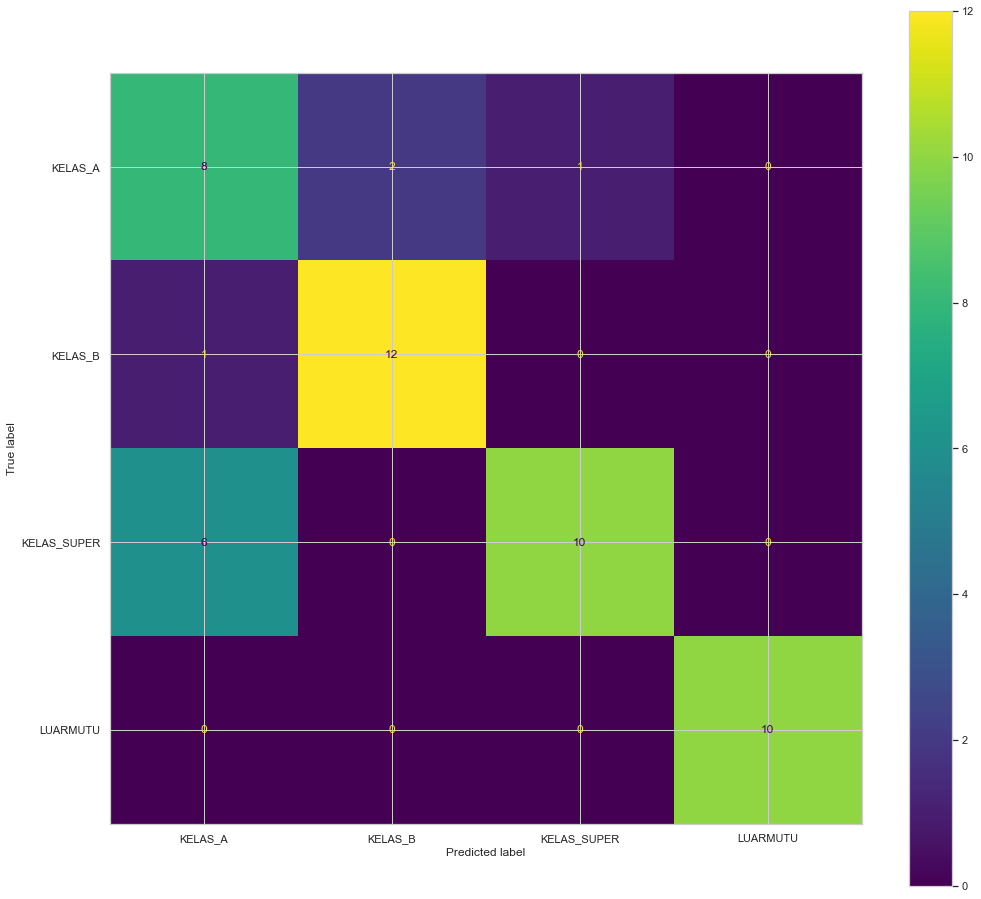

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test8, y_pred8, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test8, y_pred8, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.53      0.73      0.62        11
     KELAS_B       0.86      0.92      0.89        13
 KELAS_SUPER       0.91      0.62      0.74        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.81        50
weighted avg       0.83      0.80      0.80        50



# ---------------------------------------------------------

# Model 9

# Training

In [16]:
model9.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history9 = model9.fit(datagen.flow(x_train9, y_train9),
            validation_data=(x_val9, y_val9),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 2.1659 - accuracy: 0.3163 - val_loss: 1.4557 - val_accuracy: 0.3889
Epoch 2/200
4/4 [==============================] - 2s 471ms/step - loss: 1.2172 - accuracy: 0.5000 - val_loss: 1.4634 - val_accuracy: 0.6111
Epoch 3/200
4/4 [==============================] - 2s 362ms/step - loss: 1.3905 - accuracy: 0.5714 - val_loss: 0.5445 - val_accuracy: 0.8333
Epoch 4/200
4/4 [==============================] - 2s 350ms/step - loss: 0.9658 - accuracy: 0.5918 - val_loss: 1.1695 - val_accuracy: 0.6111
Epoch 5/200
4/4 [==============================] - 2s 451ms/step - loss: 0.7999 - accuracy: 0.6939 - val_loss: 0.7208 - val_accuracy: 0.7222
Epoch 6/200
4/4 [==============================] - 2s 566ms/step - loss: 0.8266 - accuracy: 0.7449 - val_loss: 0.8571 - val_accuracy: 0.7222
Epoch 7/200
4/4 [==============================] - 2s 466ms/step - loss: 0.8353 - accuracy: 0.7347 - val_loss: 1.0582 - val_accuracy: 0.6667
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 587ms/step - loss: 0.2611 - accuracy: 0.9184 - val_loss: 0.4666 - val_accuracy: 0.8333
Epoch 60/200
4/4 [==============================] - 2s 455ms/step - loss: 0.1561 - accuracy: 0.8980 - val_loss: 0.5048 - val_accuracy: 0.8333
Epoch 61/200
4/4 [==============================] - 2s 458ms/step - loss: 0.1607 - accuracy: 0.9388 - val_loss: 0.1924 - val_accuracy: 0.8889
Epoch 62/200
4/4 [==============================] - 2s 372ms/step - loss: 0.2860 - accuracy: 0.8878 - val_loss: 0.1388 - val_accuracy: 0.9444
Epoch 63/200
4/4 [==============================] - 2s 358ms/step - loss: 0.3161 - accuracy: 0.8673 - val_loss: 0.2492 - val_accuracy: 0.8889
Epoch 64/200
4/4 [==============================] - 2s 468ms/step - loss: 0.2689 - accuracy: 0.8980 - val_loss: 0.5066 - val_accuracy: 0.8889
Epoch 65/200
4/4 [==============================] - 2s 358ms/step - loss: 0.2883 - accuracy: 0.9082 - val_loss: 0.6540 - val_accuracy: 0.7778
Epoch 

4/4 [==============================] - 2s 459ms/step - loss: 0.4619 - accuracy: 0.8878 - val_loss: 1.3663 - val_accuracy: 0.7222
Epoch 174/200
4/4 [==============================] - 2s 466ms/step - loss: 0.7006 - accuracy: 0.8367 - val_loss: 0.2062 - val_accuracy: 0.8889
Epoch 175/200
4/4 [==============================] - 2s 450ms/step - loss: 0.2563 - accuracy: 0.8980 - val_loss: 0.4235 - val_accuracy: 0.8333
Epoch 176/200
4/4 [==============================] - 2s 472ms/step - loss: 1.4036 - accuracy: 0.7959 - val_loss: 0.3220 - val_accuracy: 0.8333
Epoch 177/200
4/4 [==============================] - 2s 475ms/step - loss: 0.2470 - accuracy: 0.9184 - val_loss: 0.3762 - val_accuracy: 0.7778
Epoch 178/200
4/4 [==============================] - 2s 466ms/step - loss: 0.2981 - accuracy: 0.8878 - val_loss: 1.6117 - val_accuracy: 0.6667
Epoch 179/200
4/4 [==============================] - 2s 468ms/step - loss: 0.6419 - accuracy: 0.8469 - val_loss: 0.2792 - val_accuracy: 0.8889
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history9.history

{'loss': [2.165945529937744,
  1.217232584953308,
  1.3905376195907593,
  0.9658010005950928,
  0.7998969554901123,
  0.8265986442565918,
  0.835294783115387,
  0.7329383492469788,
  0.4191313087940216,
  0.7990173101425171,
  0.5634914040565491,
  0.7001647353172302,
  0.4520162045955658,
  0.8154128193855286,
  0.49532580375671387,
  0.5810953974723816,
  0.3983707129955292,
  0.7015205025672913,
  0.5468736886978149,
  0.7491162419319153,
  0.5566529035568237,
  0.43669965863227844,
  0.5348881483078003,
  0.4092104732990265,
  0.34893015027046204,
  0.5527337789535522,
  0.46521884202957153,
  0.283508837223053,
  0.3023856282234192,
  0.29478660225868225,
  0.4810386598110199,
  0.5107985734939575,
  0.5436686873435974,
  0.4470861852169037,
  0.3178447484970093,
  0.4162599742412567,
  0.24190248548984528,
  0.31177854537963867,
  0.24923761188983917,
  0.3741481602191925,
  0.40807318687438965,
  0.48125970363616943,
  0.3401091396808624,
  0.3782658576965332,
  0.16726355254650

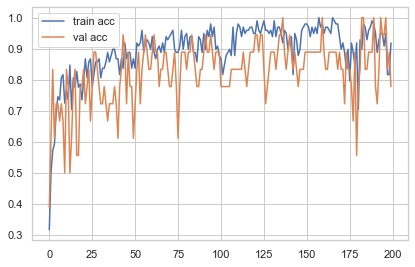

average acc = 0.8954081691801548
average val acc = 0.825833330154419
max acc = 1.0
max val acc = 1.0


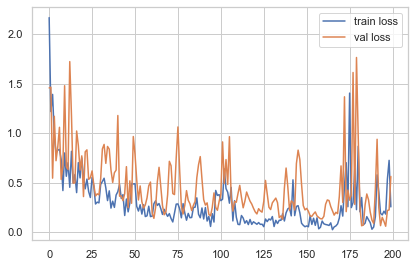

average loss = 0.29714557065628466
average val loss = 0.4591159638762474
max loss = 2.165945529937744
max val loss = 1.7631869316101074


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history9.history['accuracy'], label='train acc')
plt.plot(history9.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta9 = np.mean(history9.history['accuracy'])
print('average acc = {}'.format(ta9))
va9 = np.mean(history9.history['val_accuracy'])
print('average val acc = {}'.format(va9))
ta9a = np.max(history9.history['accuracy'])
print('max acc = {}'.format(ta9a))
va9a = np.max(history9.history['val_accuracy'])
print('max val acc = {}'.format(va9a))

# loss
plt.plot(history9.history['loss'], label='train loss')
plt.plot(history9.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl9 = np.mean(history9.history['loss'])
print('average loss = {}'.format(tl9))
vl9 = np.mean(history9.history['val_loss'])
print('average val loss = {}'.format(vl9))
tl9a = np.max(history9.history['loss'])
print('max loss = {}'.format(tl9a))
vl9a = np.max(history9.history['val_loss'])
print('max val loss = {}'.format(vl9a))

In [20]:
score9 = model9.evaluate(x_val9, y_val9,  verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

Test loss: 0.5616734027862549
Test accuracy: 0.7777777910232544


In [21]:
Y_pred9 = model9.predict_generator(x_test9)
y_pred9 = np.argmax(Y_pred9, axis=1)
y_test9 = np.argmax(y_test9, axis=1)
cm9 = confusion_matrix(y_test9, y_pred9)
print(cm9)

[[ 6  3  2  0]
 [ 1 12  0  0]
 [ 7  0  9  0]
 [ 0  1  0  9]]


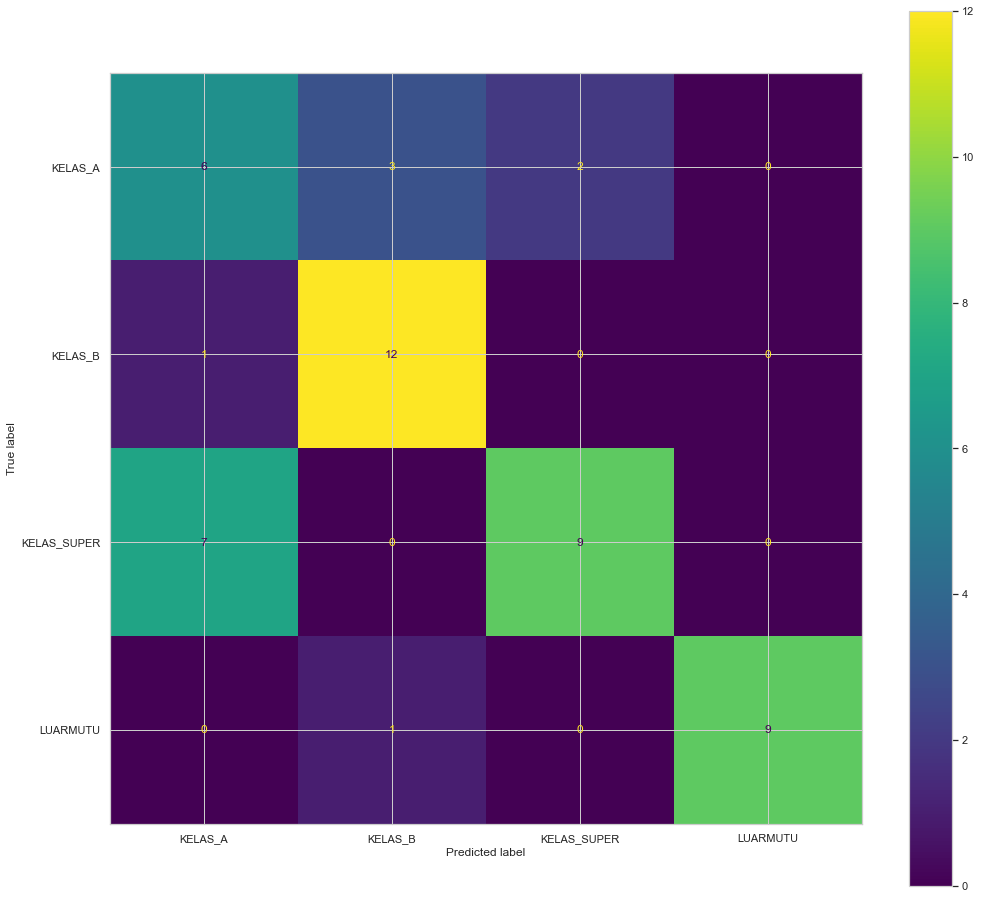

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test9, y_pred9, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test9, y_pred9, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.43      0.55      0.48        11
     KELAS_B       0.75      0.92      0.83        13
 KELAS_SUPER       0.82      0.56      0.67        16
    LUARMUTU       1.00      0.90      0.95        10

    accuracy                           0.72        50
   macro avg       0.75      0.73      0.73        50
weighted avg       0.75      0.72      0.72        50



# -----------------------------------------------------------------

# Model 10

# Training

In [16]:
model10.compile(optimizer=Adam(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history10 = model10.fit(datagen.flow(x_train10, y_train10),
            validation_data=(x_val10, y_val10),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 6.1590 - accuracy: 0.3878 - val_loss: 0.6258 - val_accuracy: 0.7222
Epoch 2/200
4/4 [==============================] - 2s 578ms/step - loss: 7.8511 - accuracy: 0.5000 - val_loss: 6.3311 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 2s 465ms/step - loss: 5.7508 - accuracy: 0.5714 - val_loss: 1.7162 - val_accuracy: 0.6667
Epoch 4/200
4/4 [==============================] - 2s 449ms/step - loss: 4.5965 - accuracy: 0.5408 - val_loss: 3.8426 - val_accuracy: 0.6111
Epoch 5/200
4/4 [==============================] - 2s 579ms/step - loss: 2.7355 - accuracy: 0.6837 - val_loss: 0.6045 - val_accuracy: 0.8333
Epoch 6/200
4/4 [==============================] - 2s 470ms/step - loss: 2.1301 - accuracy: 0.7143 - val_loss: 0.8348 - val_accuracy: 0.7778
Epoch 7/200
4/4 [==============================] - 2s 455ms/step - loss: 1.2748 - accuracy: 0.7245 - val_loss: 2.8817 - val_accuracy: 0.6111
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 463ms/step - loss: 0.6657 - accuracy: 0.9082 - val_loss: 0.9316 - val_accuracy: 0.8889
Epoch 60/200
4/4 [==============================] - 2s 458ms/step - loss: 0.8131 - accuracy: 0.8673 - val_loss: 1.2394 - val_accuracy: 0.8889
Epoch 61/200
4/4 [==============================] - 2s 467ms/step - loss: 0.6570 - accuracy: 0.8878 - val_loss: 4.2868 - val_accuracy: 0.6667
Epoch 62/200
4/4 [==============================] - 2s 469ms/step - loss: 0.7463 - accuracy: 0.8776 - val_loss: 1.9575 - val_accuracy: 0.7778
Epoch 63/200
4/4 [==============================] - 2s 459ms/step - loss: 0.5385 - accuracy: 0.9082 - val_loss: 1.0401 - val_accuracy: 0.9444
Epoch 64/200
4/4 [==============================] - 2s 462ms/step - loss: 0.2862 - accuracy: 0.9490 - val_loss: 1.6306 - val_accuracy: 0.8333
Epoch 65/200
4/4 [==============================] - 2s 361ms/step - loss: 0.4791 - accuracy: 0.9286 - val_loss: 2.7787 - val_accuracy: 0.7778
Epoch 

4/4 [==============================] - 2s 465ms/step - loss: 0.3327 - accuracy: 0.9694 - val_loss: 2.2084 - val_accuracy: 0.8889
Epoch 174/200
4/4 [==============================] - 2s 368ms/step - loss: 0.0945 - accuracy: 0.9694 - val_loss: 2.2473 - val_accuracy: 0.8889
Epoch 175/200
4/4 [==============================] - 2s 458ms/step - loss: 0.1216 - accuracy: 0.9694 - val_loss: 2.4531 - val_accuracy: 0.8889
Epoch 176/200
4/4 [==============================] - 2s 464ms/step - loss: 0.0102 - accuracy: 0.9898 - val_loss: 2.7439 - val_accuracy: 0.8889
Epoch 177/200
4/4 [==============================] - 2s 470ms/step - loss: 0.4898 - accuracy: 0.9592 - val_loss: 2.6984 - val_accuracy: 0.8889
Epoch 178/200
4/4 [==============================] - 2s 583ms/step - loss: 0.0299 - accuracy: 0.9898 - val_loss: 2.4362 - val_accuracy: 0.8889
Epoch 179/200
4/4 [==============================] - 2s 475ms/step - loss: 0.3571 - accuracy: 0.9592 - val_loss: 2.0932 - val_accuracy: 0.8889
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history10.history

{'loss': [6.1589837074279785,
  7.851066589355469,
  5.750840187072754,
  4.596481800079346,
  2.735546827316284,
  2.130063772201538,
  1.2748063802719116,
  1.0824882984161377,
  1.8228240013122559,
  0.7919161915779114,
  1.4186547994613647,
  0.735664427280426,
  0.9867556095123291,
  1.115583896636963,
  1.734500527381897,
  1.761507272720337,
  2.2439334392547607,
  1.0339211225509644,
  1.595598816871643,
  1.7294877767562866,
  1.3115229606628418,
  1.0213595628738403,
  0.7915380001068115,
  0.7462407350540161,
  0.8249499201774597,
  1.170962929725647,
  1.5448802709579468,
  0.9658531546592712,
  0.6876972913742065,
  1.2792080640792847,
  2.636030435562134,
  1.8829635381698608,
  1.0821021795272827,
  1.0971777439117432,
  1.4931764602661133,
  0.8177004456520081,
  0.6133000254631042,
  0.5065703392028809,
  1.6072840690612793,
  1.5106861591339111,
  4.364156246185303,
  1.317650318145752,
  1.055655837059021,
  1.228435754776001,
  1.488128662109375,
  1.165854096412658

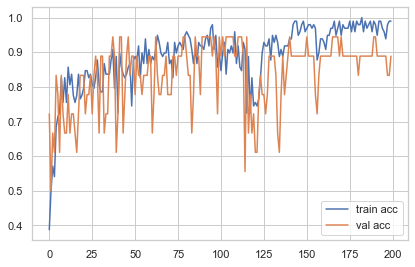

average acc = 0.8897449004650116
average val acc = 0.838888885974884
max acc = 1.0
max val acc = 0.9444444179534912


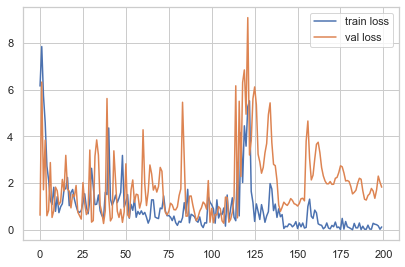

average loss = 0.9774790755053983
average val loss = 1.9547070014476775
max loss = 7.851066589355469
max val loss = 9.091113090515137


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history10.history['accuracy'], label='train acc')
plt.plot(history10.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta10 = np.mean(history10.history['accuracy'])
print('average acc = {}'.format(ta10))
va10 = np.mean(history10.history['val_accuracy'])
print('average val acc = {}'.format(va10))
ta10a = np.max(history10.history['accuracy'])
print('max acc = {}'.format(ta10a))
va10a = np.max(history10.history['val_accuracy'])
print('max val acc = {}'.format(va10a))


# loss
plt.plot(history10.history['loss'], label='train loss')
plt.plot(history10.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl10 = np.mean(history10.history['loss'])
print('average loss = {}'.format(tl10))
vl10 = np.mean(history10.history['val_loss'])
print('average val loss = {}'.format(vl10))
tl10a = np.max(history10.history['loss'])
print('max loss = {}'.format(tl10a))
vl10a = np.max(history10.history['val_loss'])
print('max val loss = {}'.format(vl10a))

In [20]:
score10 = model10.evaluate(x_val10, y_val10,  verbose=0)
print('Test loss:', score10[0])
print('Test accuracy:', score10[1])

Test loss: 1.8257508277893066
Test accuracy: 0.8888888955116272


In [21]:
Y_pred10 = model10.predict_generator(x_test10)
y_pred10 = np.argmax(Y_pred10, axis=1)
y_test10 = np.argmax(y_test10, axis=1)
cm10 = confusion_matrix(y_test10, y_pred10)
print(cm10)


[[ 9  1  1  0]
 [ 2 11  0  0]
 [ 0  0 16  0]
 [ 0  0  0 10]]


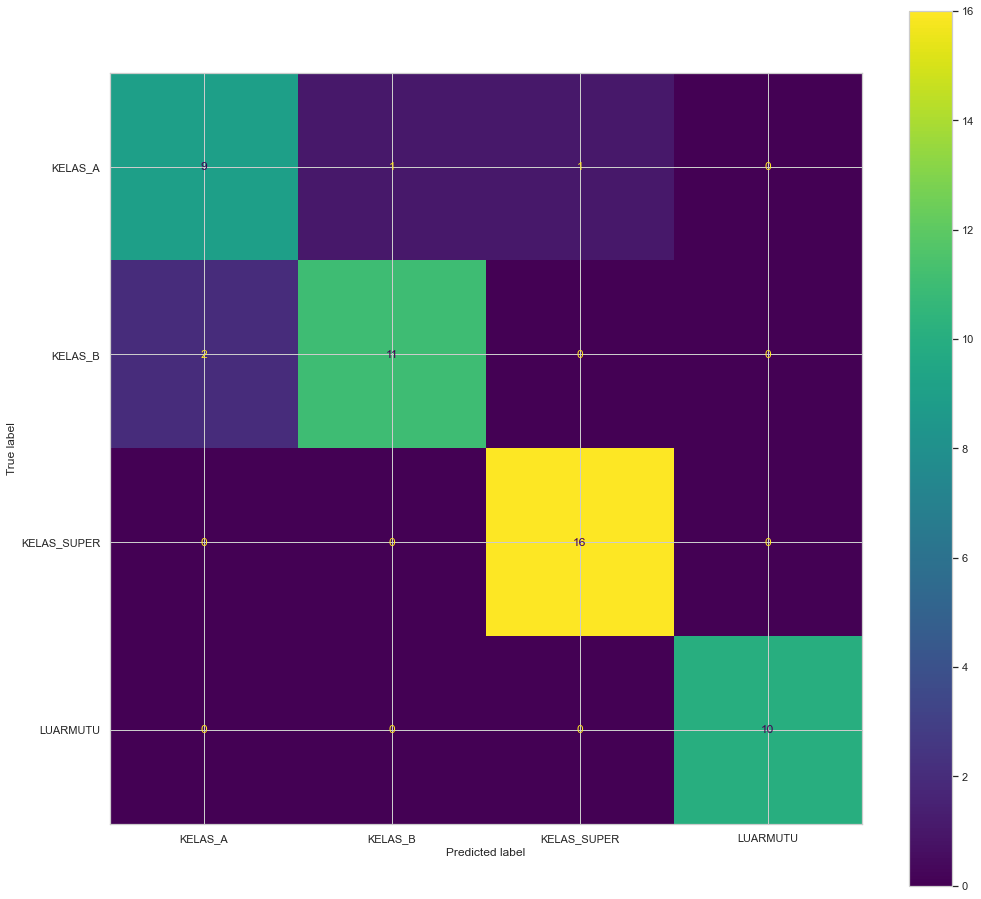

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test10, y_pred10, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test10, y_pred10, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.82      0.82      0.82        11
     KELAS_B       0.92      0.85      0.88        13
 KELAS_SUPER       0.94      1.00      0.97        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



# --------------------------------------------------------

# Model 11

# training

In [16]:
model11.compile(optimizer=Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history11 = model11.fit(datagen.flow(x_train11,y_train11),
            validation_data=(x_val11, y_val11),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 1.6615 - accuracy: 0.2449 - val_loss: 1.3154 - val_accuracy: 0.2778
Epoch 2/200
4/4 [==============================] - 2s 449ms/step - loss: 1.4114 - accuracy: 0.3367 - val_loss: 1.1930 - val_accuracy: 0.5000
Epoch 3/200
4/4 [==============================] - 2s 361ms/step - loss: 1.2613 - accuracy: 0.3878 - val_loss: 1.0180 - val_accuracy: 0.5556
Epoch 4/200
4/4 [==============================] - 2s 460ms/step - loss: 1.1846 - accuracy: 0.3673 - val_loss: 0.8919 - val_accuracy: 0.8333
Epoch 5/200
4/4 [==============================] - 2s 457ms/step - loss: 1.1274 - accuracy: 0.5510 - val_loss: 0.7930 - val_accuracy: 0.7778
Epoch 6/200
4/4 [==============================] - 2s 465ms/step - loss: 1.1017 - accuracy: 0.5306 - val_loss: 0.7625 - val_accuracy: 0.8333
Epoch 7/200
4/4 [==============================] - 2s 357ms/step - loss: 1.0426 - accuracy: 0.5612 - val_loss: 0.7509 - val_accuracy: 0.7778
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 470ms/step - loss: 0.4011 - accuracy: 0.8571 - val_loss: 0.4149 - val_accuracy: 0.8889
Epoch 60/200
4/4 [==============================] - 2s 378ms/step - loss: 0.4249 - accuracy: 0.8163 - val_loss: 0.4283 - val_accuracy: 0.8333
Epoch 61/200
4/4 [==============================] - 2s 465ms/step - loss: 0.4050 - accuracy: 0.8673 - val_loss: 0.4140 - val_accuracy: 0.8333
Epoch 62/200
4/4 [==============================] - 2s 456ms/step - loss: 0.4162 - accuracy: 0.8367 - val_loss: 0.3752 - val_accuracy: 0.8889
Epoch 63/200
4/4 [==============================] - 2s 585ms/step - loss: 0.4312 - accuracy: 0.8265 - val_loss: 0.3407 - val_accuracy: 0.8889
Epoch 64/200
4/4 [==============================] - 2s 582ms/step - loss: 0.5210 - accuracy: 0.7551 - val_loss: 0.3316 - val_accuracy: 0.9444
Epoch 65/200
4/4 [==============================] - 2s 593ms/step - loss: 0.4183 - accuracy: 0.8265 - val_loss: 0.3399 - val_accuracy: 0.9444
Epoch 

4/4 [==============================] - 2s 596ms/step - loss: 0.2102 - accuracy: 0.9388 - val_loss: 0.2849 - val_accuracy: 0.8889
Epoch 174/200
4/4 [==============================] - 2s 590ms/step - loss: 0.2729 - accuracy: 0.8673 - val_loss: 0.2837 - val_accuracy: 0.9444
Epoch 175/200
4/4 [==============================] - 2s 473ms/step - loss: 0.2221 - accuracy: 0.9388 - val_loss: 0.2814 - val_accuracy: 0.8889
Epoch 176/200
4/4 [==============================] - 2s 590ms/step - loss: 0.2441 - accuracy: 0.9286 - val_loss: 0.2666 - val_accuracy: 0.9444
Epoch 177/200
4/4 [==============================] - 2s 472ms/step - loss: 0.2741 - accuracy: 0.9388 - val_loss: 0.2606 - val_accuracy: 0.9444
Epoch 178/200
4/4 [==============================] - 2s 475ms/step - loss: 0.2221 - accuracy: 0.9490 - val_loss: 0.2560 - val_accuracy: 0.8889
Epoch 179/200
4/4 [==============================] - 2s 476ms/step - loss: 0.2004 - accuracy: 0.9490 - val_loss: 0.2608 - val_accuracy: 0.8889
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history11.history

{'loss': [1.6614632606506348,
  1.411415696144104,
  1.2613211870193481,
  1.184585452079773,
  1.1273728609085083,
  1.1017237901687622,
  1.0425899028778076,
  0.9417506456375122,
  0.9469884634017944,
  0.8566446900367737,
  0.7318828105926514,
  0.8002774119377136,
  0.7538528442382812,
  0.7523224353790283,
  0.7571411728858948,
  0.7183623909950256,
  0.6557626724243164,
  0.752178430557251,
  0.6953880786895752,
  0.5827699899673462,
  0.6092415452003479,
  0.6252346634864807,
  0.6266326904296875,
  0.5721235275268555,
  0.5604591965675354,
  0.651648998260498,
  0.6270826458930969,
  0.60040682554245,
  0.5326330661773682,
  0.49810677766799927,
  0.5294201970100403,
  0.5107424855232239,
  0.5300238728523254,
  0.554976224899292,
  0.5714597105979919,
  0.47641655802726746,
  0.48324233293533325,
  0.5154754519462585,
  0.5047785639762878,
  0.5106345415115356,
  0.49008989334106445,
  0.5011271238327026,
  0.4333455562591553,
  0.4659876227378845,
  0.4712306559085846,
  0.4

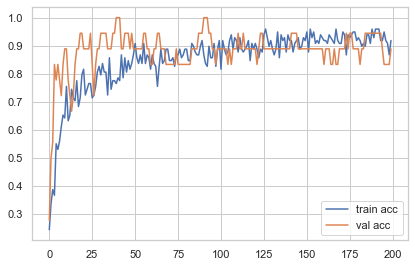

average acc = 0.8518367333710194
average val acc = 0.8813888832926751
max acc = 0.9591836929321289
max val acc = 1.0


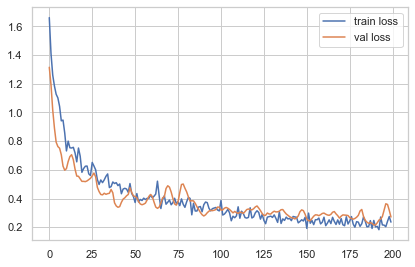

average loss = 0.3925355570018291
average val loss = 0.38139015667140486
max loss = 1.6614632606506348
max val loss = 1.3154007196426392


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history11.history['accuracy'], label='train acc')
plt.plot(history11.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta11 = np.mean(history11.history['accuracy'])
print('average acc = {}'.format(ta11))
va11 = np.mean(history11.history['val_accuracy'])
print('average val acc = {}'.format(va11))
ta11a = np.max(history11.history['accuracy'])
print('max acc = {}'.format(ta11a))
va11a = np.max(history11.history['val_accuracy'])
print('max val acc = {}'.format(va11a))


# loss
plt.plot(history11.history['loss'], label='train loss')
plt.plot(history11.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl11 = np.mean(history11.history['loss'])
print('average loss = {}'.format(tl11))
vl11 = np.mean(history11.history['val_loss'])
print('average val loss = {}'.format(vl11))
tl11a = np.max(history11.history['loss'])
print('max loss = {}'.format(tl11a))
vl11a = np.max(history11.history['val_loss'])
print('max val loss = {}'.format(vl11a))

In [20]:
score11 = model11.evaluate(x_val11, y_val11,  verbose=0)
print('Test loss:', score11[0])
print('Test accuracy:', score11[1])

Test loss: 0.2712208032608032
Test accuracy: 0.8888888955116272


In [21]:
Y_pred11 = model11.predict_generator(x_test11)
y_pred11 = np.argmax(Y_pred11, axis=1)
y_test11 = np.argmax(y_test11, axis=1)
cm11 = confusion_matrix(y_test11, y_pred11)
print(cm11)

[[ 8  3  0  0]
 [ 1 12  0  0]
 [ 3  0 13  0]
 [ 0  0  0 10]]


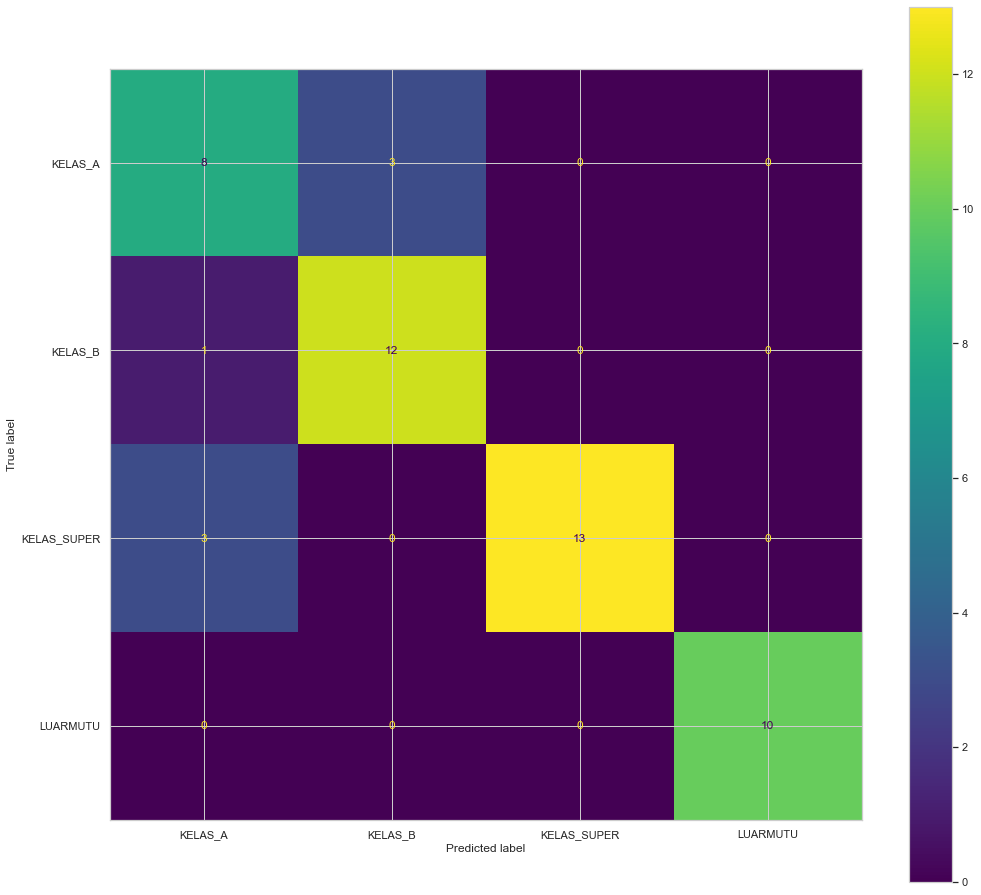

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test11, y_pred11, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test11, y_pred11, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.67      0.73      0.70        11
     KELAS_B       0.80      0.92      0.86        13
 KELAS_SUPER       1.00      0.81      0.90        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.86        50
   macro avg       0.87      0.87      0.86        50
weighted avg       0.87      0.86      0.86        50



# -----------------------------------------------------------

# Model 12

# training

In [16]:
model12.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history12 =model12.fit(datagen.flow(x_train12, y_train12),
            validation_data=(x_val12, y_val12),
            epochs=200)

Epoch 1/200
4/4 [==============================] - 27s 4s/step - loss: 1.6902 - accuracy: 0.2551 - val_loss: 0.9971 - val_accuracy: 0.6111
Epoch 2/200
4/4 [==============================] - 2s 359ms/step - loss: 1.0902 - accuracy: 0.5306 - val_loss: 0.8060 - val_accuracy: 0.6667
Epoch 3/200
4/4 [==============================] - 2s 455ms/step - loss: 1.0776 - accuracy: 0.5612 - val_loss: 0.5776 - val_accuracy: 0.7778
Epoch 4/200
4/4 [==============================] - 2s 456ms/step - loss: 0.7631 - accuracy: 0.7245 - val_loss: 0.7719 - val_accuracy: 0.5556
Epoch 5/200
4/4 [==============================] - 2s 458ms/step - loss: 0.6766 - accuracy: 0.7857 - val_loss: 0.5377 - val_accuracy: 0.7222
Epoch 6/200
4/4 [==============================] - 2s 572ms/step - loss: 0.7472 - accuracy: 0.6939 - val_loss: 0.5213 - val_accuracy: 0.8333
Epoch 7/200
4/4 [==============================] - 2s 460ms/step - loss: 0.6022 - accuracy: 0.7653 - val_loss: 0.6100 - val_accuracy: 0.6111
Epoch 8/200
4/4

Epoch 59/200
4/4 [==============================] - 2s 464ms/step - loss: 0.2716 - accuracy: 0.8776 - val_loss: 0.6743 - val_accuracy: 0.7222
Epoch 60/200
4/4 [==============================] - 2s 451ms/step - loss: 0.3057 - accuracy: 0.8878 - val_loss: 0.7840 - val_accuracy: 0.6111
Epoch 61/200
4/4 [==============================] - 2s 459ms/step - loss: 0.2866 - accuracy: 0.8878 - val_loss: 0.6862 - val_accuracy: 0.6667
Epoch 62/200
4/4 [==============================] - 2s 466ms/step - loss: 0.4097 - accuracy: 0.8367 - val_loss: 0.5626 - val_accuracy: 0.8333
Epoch 63/200
4/4 [==============================] - 2s 451ms/step - loss: 0.2973 - accuracy: 0.9082 - val_loss: 0.4318 - val_accuracy: 0.7778
Epoch 64/200
4/4 [==============================] - 2s 469ms/step - loss: 0.2182 - accuracy: 0.9286 - val_loss: 0.4387 - val_accuracy: 0.6667
Epoch 65/200
4/4 [==============================] - 2s 584ms/step - loss: 0.2642 - accuracy: 0.8776 - val_loss: 0.3481 - val_accuracy: 0.7778
Epoch 

4/4 [==============================] - 2s 585ms/step - loss: 0.0955 - accuracy: 0.9592 - val_loss: 0.2567 - val_accuracy: 0.8333
Epoch 174/200
4/4 [==============================] - 2s 597ms/step - loss: 0.1249 - accuracy: 0.9490 - val_loss: 0.2767 - val_accuracy: 0.8333
Epoch 175/200
4/4 [==============================] - 2s 582ms/step - loss: 0.1177 - accuracy: 0.9490 - val_loss: 0.2981 - val_accuracy: 0.8333
Epoch 176/200
4/4 [==============================] - 2s 466ms/step - loss: 0.1301 - accuracy: 0.9286 - val_loss: 0.2940 - val_accuracy: 0.8889
Epoch 177/200
4/4 [==============================] - 2s 370ms/step - loss: 0.1062 - accuracy: 0.9592 - val_loss: 0.2210 - val_accuracy: 0.8889
Epoch 178/200
4/4 [==============================] - 2s 363ms/step - loss: 0.1509 - accuracy: 0.9490 - val_loss: 0.2112 - val_accuracy: 0.8889
Epoch 179/200
4/4 [==============================] - 2s 465ms/step - loss: 0.0637 - accuracy: 0.9694 - val_loss: 0.2525 - val_accuracy: 0.8889
Epoch 180/200

# evaluasi testing dan visualisasi

In [18]:
history12.history

{'loss': [1.6901838779449463,
  1.0902408361434937,
  1.0776447057724,
  0.7630850076675415,
  0.676649272441864,
  0.7472424507141113,
  0.6021848917007446,
  0.4426276683807373,
  0.5179772973060608,
  0.42796826362609863,
  0.5363578200340271,
  0.46122172474861145,
  0.430612713098526,
  0.4698939323425293,
  0.5452674031257629,
  0.4946820139884949,
  0.42710304260253906,
  0.4949016869068146,
  0.39557915925979614,
  0.3502025902271271,
  0.3973195254802704,
  0.3280995488166809,
  0.3082648813724518,
  0.41195258498191833,
  0.3506637215614319,
  0.3292856812477112,
  0.42236655950546265,
  0.3563627600669861,
  0.3506461977958679,
  0.4837404489517212,
  0.29672059416770935,
  0.4645131826400757,
  0.33166417479515076,
  0.26999378204345703,
  0.33000871539115906,
  0.3582287132740021,
  0.3932762145996094,
  0.22833406925201416,
  0.39886152744293213,
  0.3608558773994446,
  0.25603803992271423,
  0.2128712385892868,
  0.22195282578468323,
  0.3402900993824005,
  0.38142585754

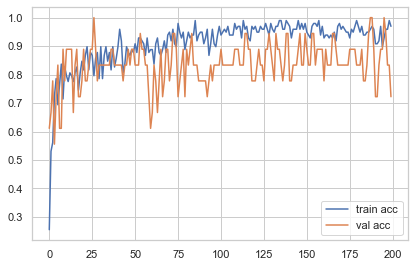

average acc = 0.9105102095007896
average val acc = 0.837499993443489
max acc = 0.9897959232330322
max val acc = 1.0


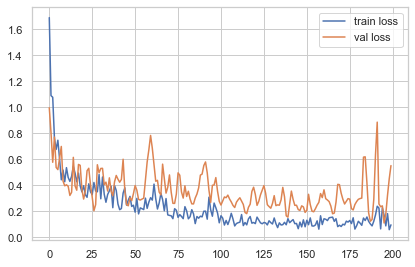

average loss = 0.22643508100882173
average val loss = 0.35929511811584236
max loss = 1.6901838779449463
max val loss = 0.9971280694007874


In [19]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history12.history['accuracy'], label='train acc')
plt.plot(history12.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta12 = np.mean(history12.history['accuracy'])
print('average acc = {}'.format(ta12))
va12 = np.mean(history12.history['val_accuracy'])
print('average val acc = {}'.format(va12))
ta12a = np.max(history12.history['accuracy'])
print('max acc = {}'.format(ta12a))
va12a = np.max(history12.history['val_accuracy'])
print('max val acc = {}'.format(va12a))

# loss
plt.plot(history12.history['loss'], label='train loss')
plt.plot(history12.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl12 = np.mean(history12.history['loss'])
print('average loss = {}'.format(tl12))
vl12 = np.mean(history12.history['val_loss'])
print('average val loss = {}'.format(vl12))
tl12a = np.max(history12.history['loss'])
print('max loss = {}'.format(tl12a))
vl12a = np.max(history12.history['val_loss'])
print('max val loss = {}'.format(vl12a))

In [20]:
score12 = model12.evaluate(x_val12, y_val12,  verbose=0)
print('Test loss:', score12[0])
print('Test accuracy:', score12[1])

Test loss: 0.5520021319389343
Test accuracy: 0.7222222089767456


In [21]:
Y_pred12 = model12.predict_generator(x_test12)
y_pred12 = np.argmax(Y_pred12, axis=1)
y_test12 = np.argmax(y_test12, axis=1)
cm12 = confusion_matrix(y_test12, y_pred12)
print(cm12)

[[ 4  6  1  0]
 [ 0 13  0  0]
 [ 3  1 12  0]
 [ 0  0  0 10]]


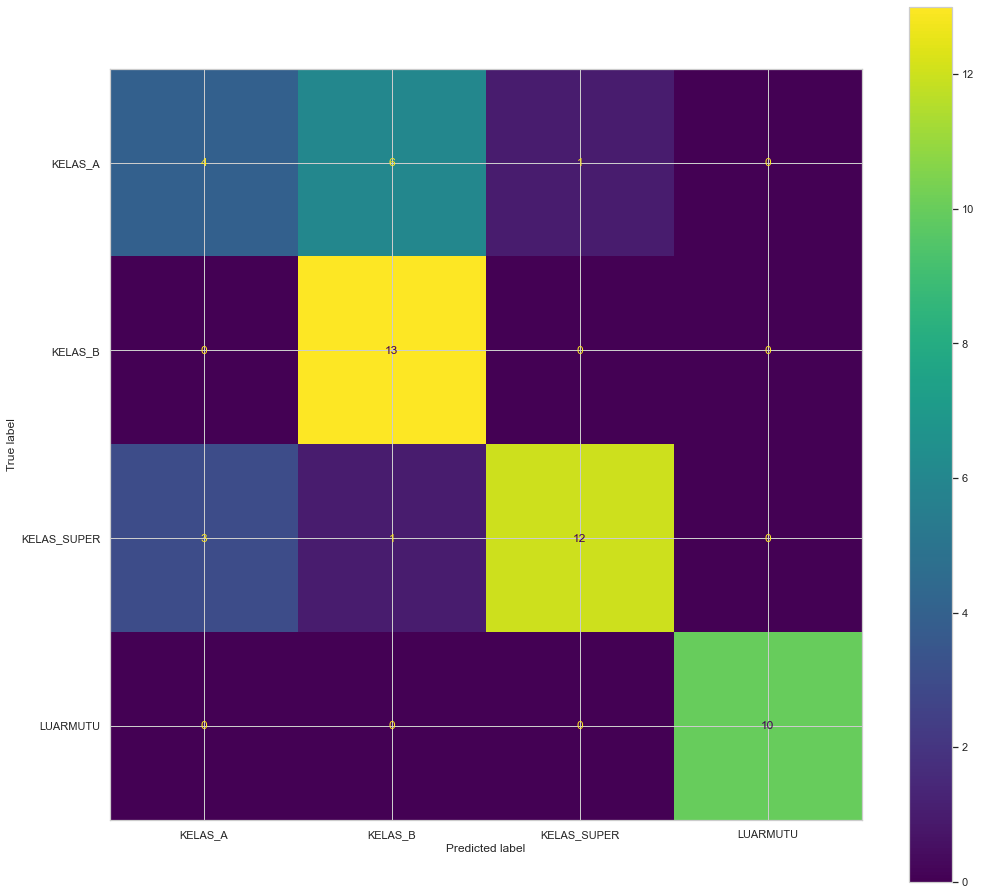

In [22]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test12, y_pred12, ax=ax, display_labels=target_names)
plt.show()

In [23]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test12, y_pred12, target_names=target_names))

              precision    recall  f1-score   support

     KELAS_A       0.57      0.36      0.44        11
     KELAS_B       0.65      1.00      0.79        13
 KELAS_SUPER       0.92      0.75      0.83        16
    LUARMUTU       1.00      1.00      1.00        10

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.76        50
weighted avg       0.79      0.78      0.77        50



# Implementasi Dropout ke model terbaik dengan epochs 100

# model x dengan dropout 0.25

In [ ]:
xa = tf.keras.layers.Flatten()(last_output)
xa = tf.keras.layers.Dropout(0.25)(xa)
xa = tf.keras.layers.Dense(4, activation='softmax')(xa)
model13 = tf.keras.Model(inceptionv3.input, xa)
model13.summary()

In [ ]:
model13.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history13 = model13.fit(datagen.flow(x_train13, y_train13),
            validation_data=(x_val13, y_val13),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history13.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history13.history['accuracy'], label='train acc')
plt.plot(history13.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta13 = np.mean(history13.history['accuracy'])
print('average acc = {}'.format(ta13))
va13 = np.mean(history13.history['val_accuracy'])
print('average val acc = {}'.format(va13))
ta13a = np.max(history13.history['accuracy'])
print('max acc = {}'.format(ta13a))
va13a = np.max(history13.history['val_accuracy'])
print('max val acc = {}'.format(va13a))

# loss
plt.plot(history13.history['loss'], label='train loss')
plt.plot(history13.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl13 = np.mean(history13.history['loss'])
print('average loss = {}'.format(tl13))
vl13 = np.mean(history13.history['val_loss'])
print('average val loss = {}'.format(vl13))
tl13a = np.max(history13.history['loss'])
print('max loss = {}'.format(tl13a))
vl13a = np.max(history13.history['val_loss'])
print('max val loss = {}'.format(vl13a))

In [ ]:
score13 = model13.evaluate(x_val13, y_val13,  verbose=0)
print('Test loss:', score13[0])
print('Test accuracy:', score13[1])

In [ ]:
Y_pred13 = model13.predict_generator(x_test13)
y_pred13 = np.argmax(Y_pred13, axis=1)
y_test13 = np.argmax(y_test13, axis=1)
cm13 = confusion_matrix(y_test13, y_pred13)
print(cm13)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test13, y_pred13, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test13, y_pred13, target_names=target_names))

# -------------------------------------------------------

# model x dengan dropout 0.5

In [ ]:
xb = tf.keras.layers.Flatten()(last_output)
xb = tf.keras.layers.Dropout(0.5)(xb)
xb = tf.keras.layers.Dense(4, activation='softmax')(xb)
model14 = tf.keras.Model(inceptionv3.input, xb)
model14.summary()

In [ ]:
model14.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history14 = model14.fit(datagen.flow(x_train14, y_train14),
            validation_data=(x_val14, y_val14),
            epochs=100)

# evaluasi test dan visualisasi

In [ ]:
history14.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history14.history['accuracy'], label='train acc')
plt.plot(history14.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta14 = np.mean(history14.history['accuracy'])
print('average acc = {}'.format(ta14))
va14 = np.mean(history14.history['val_accuracy'])
print('average val acc = {}'.format(va14))
ta14a = np.max(history14.history['accuracy'])
print('max acc = {}'.format(ta14a))
va14a = np.max(history14.history['val_accuracy'])
print('max val acc = {}'.format(va14a))

# loss
plt.plot(history14.history['loss'], label='train loss')
plt.plot(history14.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl14 = np.mean(history14.history['loss'])
print('average loss = {}'.format(tl14))
vl14 = np.mean(history14.history['val_loss'])
print('average val loss = {}'.format(vl14))
tl14a = np.max(history14.history['loss'])
print('max loss = {}'.format(tl14a))
vl14a = np.max(history14.history['val_loss'])
print('max val loss = {}'.format(vl14a))

In [ ]:
score14 = model14.evaluate(x_val14, y_val14,  verbose=0)
print('Test loss:', score14[0])
print('Test accuracy:', score14[1])

In [ ]:
Y_pred14 = model14.predict_generator(x_test14)
y_pred14 = np.argmax(Y_pred14, axis=1)
y_test14 = np.argmax(y_test14, axis=1)
cm14 = confusion_matrix(y_test14, y_pred14)
print(cm14)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test14, y_pred14, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test14, y_pred14, target_names=target_names))

# -----------------------------------------------------------

# model x dengan dropout 0.75

In [ ]:
xc = tf.keras.layers.Flatten()(last_output)
xc = tf.keras.layers.Dropout(0.75)(xc)
xc = tf.keras.layers.Dense(4, activation='softmax')(xc)
model15 = tf.keras.Model(inceptionv3.input, xc)
model15.summary()

In [ ]:
model15.compile(optimizer=Adam(lr=0.00005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history15=model15.fit(datagen.flow(x_train15, y_train15),
            validation_data=(x_val15, y_val15),
            epochs=100)

# evaluasi testing dan visualisasi

In [ ]:
history15.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history15.history['accuracy'], label='train acc')
plt.plot(history15.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta15 = np.mean(history15.history['accuracy'])
print('average acc = {}'.format(ta15))
va15 = np.mean(history15.history['val_accuracy'])
print('average val acc = {}'.format(va15))
ta15a = np.max(history15.history['accuracy'])
print('max acc = {}'.format(ta15a))
va15a = np.max(history15.history['val_accuracy'])
print('max val acc = {}'.format(va15a))

# loss
plt.plot(history15.history['loss'], label='train loss')
plt.plot(history15.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl15 = np.mean(history15.history['loss'])
print('average loss = {}'.format(tl15))
vl15 = np.mean(history15.history['val_loss'])
print('average val loss = {}'.format(vl15))
tl15a = np.max(history15.history['loss'])
print('max loss = {}'.format(tl15a))
vl15a = np.max(history15.history['val_loss'])
print('max val loss = {}'.format(vl15a))

In [ ]:
score15 = model15.evaluate(x_val15, y_val15,  verbose=0)
print('Test loss:', score15[0])
print('Test accuracy:', score15[1])

In [ ]:
Y_pred15 = model15.predict_generator(x_test15)
y_pred15 = np.argmax(Y_pred15, axis=1)
y_test15 = np.argmax(y_test15, axis=1)
cm15 = confusion_matrix(y_test15, y_pred15)
print(cm15)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test15, y_pred15, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test15, y_pred15, target_names=target_names))

# --------------------------------------------------------------------------------

# Implementasi Dropout ke model terbaik dengan epochs 200

# Model x dengan dropout 0.25

# Training

In [ ]:
xd = tf.keras.layers.Flatten()(last_output)
xd = tf.keras.layers.Dropout(0.25)(xd)
xd = tf.keras.layers.Dense(4, activation='softmax')(xd)
model16 = tf.keras.Model(inceptionv3.input, xd)
model16.summary()

In [ ]:
model16.compile(optimizer=Adam(lr=0.0001), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history16 = model16.fit(datagen.flow(x_train16, y_train16),
            validation_data=(x_val16, y_val16),
            epochs=200)

# evaluasi testing dan visualisasi

In [ ]:
history16.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history16.history['accuracy'], label='train acc')
plt.plot(history16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta16 = np.mean(history16.history['accuracy'])
print('average acc = {}'.format(ta16))
va16 = np.mean(history16.history['val_accuracy'])
print('average val acc = {}'.format(va16))
ta16a = np.max(history16.history['accuracy'])
print('max acc = {}'.format(ta16a))
va16a = np.max(history16.history['val_accuracy'])
print('max val acc = {}'.format(va16a))

# loss
plt.plot(history16.history['loss'], label='train loss')
plt.plot(history16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl16 = np.mean(history16.history['loss'])
print('average loss = {}'.format(tl16))
vl16 = np.mean(history16.history['val_loss'])
print('average val loss = {}'.format(vl16))
tl16a = np.max(history16.history['loss'])
print('max loss = {}'.format(tl16a))
vl16a = np.max(history16.history['val_loss'])
print('max val loss = {}'.format(vl16a))

In [ ]:
score16 = model16.evaluate(x_val16, y_val16,  verbose=0)
print('Test loss:', score16[0])
print('Test accuracy:', score16[1])

In [ ]:
Y_pred16 = model16.predict_generator(x_test16)
y_pred16 = np.argmax(Y_pred16, axis=1)
y_test16 = np.argmax(y_test16, axis=1)
cm16 = confusion_matrix(y_test16, y_pred16)
print(cm16)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test16, y_pred16, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test16, y_pred16, target_names=target_names))

# --------------------------------------------------------

# model x dengan dropout 0.5

# Training

In [ ]:
xe = tf.keras.layers.Flatten()(last_output)
xe = tf.keras.layers.Dropout(0.5)(xe)
xe = tf.keras.layers.Dense(4, activation='softmax')(xe)
model17 = tf.keras.Model(inceptionv3.input, xe)
model17.summary()

In [ ]:
model17.compile(optimizer=Adam(lr=0.0001), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history17 = model17.fit(datagen.flow(x_train17, y_train17),
            validation_data=(x_val17, y_val17),
            epochs=200)

# evaluasi test dan visualisasi

In [ ]:
history17.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history17.history['accuracy'], label='train acc')
plt.plot(history17.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta17 = np.mean(history17.history['accuracy'])
print('average acc = {}'.format(ta17))
va17 = np.mean(history17.history['val_accuracy'])
print('average val acc = {}'.format(va17))
ta17a = np.max(history17.history['accuracy'])
print('max acc = {}'.format(ta17a))
va17a = np.max(history17.history['val_accuracy'])
print('max val acc = {}'.format(va17a))

# loss
plt.plot(history17.history['loss'], label='train loss')
plt.plot(history17.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl17 = np.mean(history17.history['loss'])
print('average loss = {}'.format(tl17))
vl17 = np.mean(history17.history['val_loss'])
print('average val loss = {}'.format(vl17))
tl17a = np.max(history17.history['loss'])
print('max loss = {}'.format(tl17a))
vl17a = np.max(history17.history['val_loss'])
print('max val loss = {}'.format(vl17a))

In [ ]:
score17 = model17.evaluate(x_val17, y_val17,  verbose=0)
print('Test loss:', score17[0])
print('Test accuracy:', score17[1])

In [ ]:
Y_pred17 = model17.predict_generator(x_test17)
y_pred17 = np.argmax(Y_pred17, axis=1)
y_test17 = np.argmax(y_test17, axis=1)
cm17 = confusion_matrix(y_test17, y_pred17)
print(cm17)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test17, y_pred17, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test17, y_pred17, target_names=target_names))

# ---------------------------------------------------------

# model x dengan dropout 0.75

# training

In [ ]:
xf = tf.keras.layers.Flatten()(last_output)
xf = tf.keras.layers.Dropout(0.75)(xf)
xf = tf.keras.layers.Dense(4, activation='softmax')(xf)
model18 = tf.keras.Model(inceptionv3.input, xf)
model18.summary()

In [ ]:
model18.compile(optimizer=Adam(lr=0.0001), #sesuaikan LR-nya
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history18 = model18.fit(datagen.flow(x_train18, y_train18),
            validation_data=(x_val18, y_val18),
            epochs=200)

# evaluasi testing dan visualisasi

In [ ]:
history18.history

In [ ]:
import matplotlib.pyplot as plt
# accuracies
plt.plot(history18.history['accuracy'], label='train acc')
plt.plot(history18.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
ta18 = np.mean(history18.history['accuracy'])
print('average acc = {}'.format(ta18))
va18 = np.mean(history18.history['val_accuracy'])
print('average val acc = {}'.format(va18))
ta18a = np.max(history18.history['accuracy'])
print('max acc = {}'.format(ta18a))
va18a = np.max(history18.history['val_accuracy'])
print('max val acc = {}'.format(va18a))

# loss
plt.plot(history18.history['loss'], label='train loss')
plt.plot(history18.history['val_loss'], label='val loss')
plt.legend()
plt.show()
tl18 = np.mean(history18.history['loss'])
print('average loss = {}'.format(tl18))
vl18 = np.mean(history18.history['val_loss'])
print('average val loss = {}'.format(vl18))
tl18a = np.max(history18.history['loss'])
print('max loss = {}'.format(tl18a))
vl18a = np.max(history18.history['val_loss'])
print('max val loss = {}'.format(vl18a))

In [ ]:
score18 = model18.evaluate(x_val18, y_val18,  verbose=0)
print('Test loss:', score18[0])
print('Test accuracy:', score18[1])

In [ ]:
Y_pred18 = model18.predict_generator(x_test18)
y_pred18 = np.argmax(Y_pred18, axis=1)
y_test18 = np.argmax(y_test18, axis=1)
cm18 = confusion_matrix(y_test18, y_pred18)
print(cm18)

In [ ]:
fig,ax= plt.subplots(figsize=(15,15))
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
ConfusionMatrixDisplay.from_predictions(y_test18, y_pred18, ax=ax, display_labels=target_names)
plt.show()

In [ ]:
target_names = ['KELAS_A', 'KELAS_B', 'KELAS_SUPER', 'LUARMUTU']
print(classification_report(y_test18, y_pred18, target_names=target_names))

# Save model 

In [ ]:
tf.saved_model.save(model12, "model12-291222-95acc")

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("model12-291222-95acc")
tflite_model = converter.convert()
open("model12-291222-95acc.tflite", "wb").write(tflite_model)